In [77]:
import os
import random

import numpy as np
import pysindy as ps

import torch
from torch import nn
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.nn.utils.spectral_norm as spectral_norm
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.optim.lr_scheduler import CosineAnnealingLR

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import utils

In [78]:
dataset_folder = "D:/Robotics/neural-fly-main/neural-fly-main/data/training"
RawData1 = utils.load_data(dataset_folder)

features1 = ['v']
Data1 = utils.format_data(RawData1, features=features1)

In [79]:
features2 = ['T_sp']
Data2 = utils.format_data(RawData1, features=features2)

features3 = ['R']
Data3 = utils.format_data(RawData1, features=features3)

In [80]:
features4 = ['fa']
Data7 = utils.format_data(RawData1, features=features4)

In [81]:
dataset_folder2 = "D:/Robotics/neural-fly-main/neural-fly-main/data/experiment"

features1 = ['v']
RawData2 = utils.load_data(dataset_folder2)
Data4 = utils.format_data(RawData2, features=features1)

In [82]:
features2 = ['T_sp']
Data5 = utils.format_data(RawData2, features=features2)

features3 = ['R']
Data6 = utils.format_data(RawData2, features=features3)

In [83]:
features4 = ['fa']
Data8 = utils.format_data(RawData2, features=features4)

In [84]:
v_no_wind = torch.zeros((2511,3)) 
for row in range(len(v_no_wind)):
    for column in range(3):
        v_no_wind[row][column] = Data1[5][0][row][column]
        
v_10_wind = torch.zeros((2511,3)) 
for row in range(len(v_10_wind)):
    for column in range(3):
        v_10_wind[row][column] = Data1[0][0][row][column]
        
v_20_wind = torch.zeros((2511,3))
for row in range(len(v_20_wind)):
    for column in range(3):
        v_20_wind[row][column] = Data1[1][0][row][column]
        
v_30_wind = torch.zeros((2511,3)) 
for row in range(len(v_30_wind)):
    for column in range(3):
        v_30_wind[row][column] = Data1[2][0][row][column]
        
v_40_wind = torch.zeros((2511,3)) 
for row in range(len(v_40_wind)):
    for column in range(3):
        v_40_wind[row][column] = Data1[3][0][row][column]
        
v_50_wind = torch.zeros((2511,3)) 
for row in range(len(v_50_wind)):
    for column in range(3):
        v_50_wind[row][column] = Data1[4][0][row][column]

In [85]:
fu_no_wind = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_no_wind[row][2] = Data2[5][0][row][0]
    
fu_10_wind = torch.zeros((2511,3))
for row in range(len(fu_10_wind)):
    fu_10_wind[row][2] = Data2[0][0][row][0]
    
fu_20_wind = torch.zeros((2511,3))
for row in range(len(fu_20_wind)):
    fu_20_wind[row][2] = Data2[1][0][row][0]
    
fu_30_wind = torch.zeros((2511,3))
for row in range(len(fu_30_wind)):
    fu_30_wind[row][2] = Data2[2][0][row][0]
    
fu_40_wind = torch.zeros((2511,3))
for row in range(len(fu_40_wind)):
    fu_40_wind[row][2] = Data2[3][0][row][0]
    
fu_50_wind = torch.zeros((2511,3))
for row in range(len(fu_50_wind)):
    fu_50_wind[row][2] = Data2[4][0][row][0]

In [86]:
R_no_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_no_wind)):
    for row in range(3):
        for column in range(3):
            R_no_wind[matrix][row][column] = Data3[5][0][matrix][row][column]
            
R_10_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_10_wind)):
    for row in range(3):
        for column in range(3):
            R_10_wind[matrix][row][column] = Data3[0][0][matrix][row][column]
            
R_20_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_20_wind)):
    for row in range(3):
        for column in range(3):
            R_20_wind[matrix][row][column] = Data3[1][0][matrix][row][column]
            
R_30_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_30_wind)):
    for row in range(3):
        for column in range(3):
            R_30_wind[matrix][row][column] = Data3[2][0][matrix][row][column]
            
R_40_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_40_wind)):
    for row in range(3):
        for column in range(3):
            R_40_wind[matrix][row][column] = Data3[3][0][matrix][row][column]
            
R_50_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_50_wind)):
    for row in range(3):
        for column in range(3):
            R_50_wind[matrix][row][column] = Data3[4][0][matrix][row][column]

In [87]:
Rfu_no_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_no_wind)):
    Rfu_no_wind[row] = np.matmul(R_no_wind[row],fu_no_wind[row])
    
Rfu_10_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_10_wind)):
    Rfu_10_wind[row] = np.matmul(R_10_wind[row],fu_10_wind[row])
    
Rfu_20_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_20_wind)):
    Rfu_20_wind[row] = np.matmul(R_20_wind[row],fu_20_wind[row])
    
Rfu_30_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_30_wind)):
    Rfu_30_wind[row] = np.matmul(R_30_wind[row],fu_30_wind[row])
    
Rfu_40_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_40_wind)):
    Rfu_40_wind[row] = np.matmul(R_40_wind[row],fu_40_wind[row])
    
Rfu_50_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_50_wind)):
    Rfu_50_wind[row] = np.matmul(R_50_wind[row],fu_50_wind[row])

In [88]:
fa_no_wind = torch.zeros((2511,3)) 
for row in range(len(fa_no_wind)):
    for column in range(3):
        fa_no_wind[row][column] = Data7[5][0][row][column]
        
fa_10_wind = torch.zeros((2511,3)) 
for row in range(len(fa_10_wind)):
    for column in range(3):
        fa_10_wind[row][column] = Data7[0][0][row][column]
        
fa_20_wind = torch.zeros((2511,3))
for row in range(len(fa_20_wind)):
    for column in range(3):
        fa_20_wind[row][column] = Data7[1][0][row][column]
        
fa_30_wind = torch.zeros((2511,3)) 
for row in range(len(fa_30_wind)):
    for column in range(3):
        fa_30_wind[row][column] = Data7[2][0][row][column]
        
fa_40_wind = torch.zeros((2511,3)) 
for row in range(len(fa_40_wind)):
    for column in range(3):
        fa_40_wind[row][column] = Data7[3][0][row][column]
        
fa_50_wind = torch.zeros((2511,3)) 
for row in range(len(fa_50_wind)):
    for column in range(3):
        fa_50_wind[row][column] = Data7[4][0][row][column]

In [89]:
acc_no_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_no_wind[ele] = (v_no_wind[ele+1]-v_no_wind[ele])/0.02
acc_no_wind[2510] = acc_no_wind[2509]

acc_10_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_10_wind[ele] = (v_10_wind[ele+1]-v_10_wind[ele])/0.02
acc_10_wind[2510] = acc_10_wind[2509]

acc_20_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_20_wind[ele] = (v_20_wind[ele+1]-v_20_wind[ele])/0.02
acc_20_wind[2510] = acc_20_wind[2509]

acc_30_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_30_wind[ele] = (v_30_wind[ele+1]-v_30_wind[ele])/0.02
acc_30_wind[2510] = acc_30_wind[2509]

acc_40_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_40_wind[ele] = (v_40_wind[ele+1]-v_40_wind[ele])/0.02
acc_40_wind[2510] = acc_40_wind[2509]

acc_50_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_50_wind[ele] = (v_50_wind[ele+1]-v_50_wind[ele])/0.02
acc_50_wind[2510] = acc_50_wind[2509]

In [90]:
v_b35 = torch.zeros((2511,3)) #first input feature
for row in range(len(v_b35)):
    for column in range(3):
        v_b35[row][column] = Data4[21][0][row][column]
        
v_b35.requires_grad = True

In [91]:
fu_b35 = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_b35[row][2] = Data5[21][0][row][0]

In [92]:
R_b35 = torch.zeros((2511,3,3))
for matrix in range(len(R_b35)):
    for row in range(3):
        for column in range(3):
            R_b35[matrix][row][column] = Data6[21][0][matrix][row][column]          

In [93]:
Rfu_b35 = torch.zeros((2511,3)) 
for row in range(len(Rfu_b35)):
    Rfu_b35[row] = np.matmul(R_b35[row],fu_b35[row])
    
Rfu_b35.requires_grad = True

In [94]:
acc_b35 = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_b35[ele] = (v_b35[ele+1]-v_b35[ele])/0.02
acc_b35[2510] = acc_b35[2509]

In [95]:
v_70psin20 = torch.zeros((2511,3)) #first input feature
for row in range(len(v_70psin20)):
    for column in range(3):
        v_70psin20[row][column] = Data4[22][0][row][column]
        
v_70psin20.requires_grad = True
v_70psin20[0]

tensor([-0.1817, -0.0068, -0.1428], grad_fn=<SelectBackward0>)

In [96]:
fu_70psin20 = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_70psin20[row][2] = Data5[22][0][row][0]
    
R_70psin20 = torch.zeros((2511,3,3))
for matrix in range(len(R_70psin20)):
    for row in range(3):
        for column in range(3):
            R_70psin20[matrix][row][column] = Data6[22][0][matrix][row][column] 

In [97]:
acc_70psin20 = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_70psin20[ele] = (v_70psin20[ele+1]-v_70psin20[ele])/0.02
acc_70psin20[2510] = acc_70psin20[2509]

In [98]:
Rfu_70psin20 = torch.zeros((2511,3)) 
for row in range(len(Rfu_70psin20)):
    Rfu_70psin20[row] = np.matmul(R_70psin20[row],fu_70psin20[row])
    
Rfu_70psin20.requires_grad = True

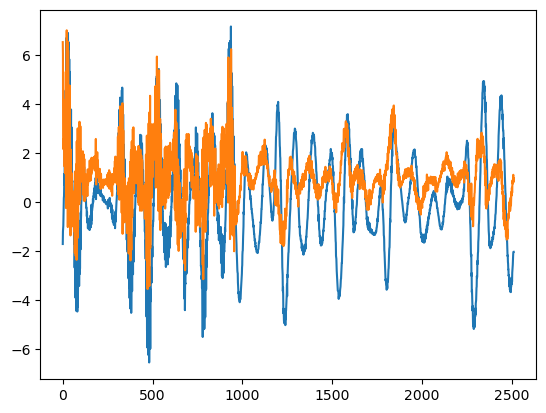

In [99]:
g = torch.tensor([0.0,0.0,-9.81])
com = g + Rfu_no_wind + fa_no_wind
plt.plot(acc_no_wind[:,0])
plt.plot(com[:,0])

In [100]:
v_b70 = torch.zeros((2511,3)) #first input feature
for row in range(len(v_b70)):
    for column in range(3):
        v_b70[row][column] = Data4[23][0][row][column]
        
v_b70.requires_grad = True

fu_b70 = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_b70[row][2] = Data5[23][0][row][0]
    
R_b70 = torch.zeros((2511,3,3))
for matrix in range(len(R_b70)):
    for row in range(3):
        for column in range(3):
            R_b70[matrix][row][column] = Data6[23][0][matrix][row][column] 
            
acc_b70 = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_b70[ele] = (v_b70[ele+1]-v_b70[ele])/0.02
acc_b70[2510] = acc_b70[2509]

Rfu_b70 = torch.zeros((2511,3)) 
for row in range(len(Rfu_b70)):
    Rfu_b70[row] = np.matmul(R_b70[row],fu_b70[row])
    
Rfu_b70.requires_grad = True

In [101]:
v_b100 = torch.zeros((2511,3)) #first input feature
for row in range(len(v_b100)):
    for column in range(3):
        v_b100[row][column] = Data4[20][0][row][column]
        
v_b100.requires_grad = True

fu_b100 = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_b100[row][2] = Data5[20][0][row][0]
    
R_b100 = torch.zeros((2511,3,3))
for matrix in range(len(R_b100)):
    for row in range(3):
        for column in range(3):
            R_b100[matrix][row][column] = Data6[20][0][matrix][row][column] 
            
acc_b100 = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_b100[ele] = (v_b100[ele+1]-v_b100[ele])/0.02
acc_b100[2510] = acc_b100[2509]

Rfu_b100 = torch.zeros((2511,3)) 
for row in range(len(Rfu_b100)):
    Rfu_b100[row] = np.matmul(R_b100[row],fu_b100[row])
    
Rfu_b100.requires_grad = True

In [102]:
ip = torch.cat((v_b35, Rfu_b35), dim = 1) #baseline35wind
ip.requires_grad 

True

In [103]:
ip2 = torch.cat((v_70psin20[:,:], Rfu_70psin20[:,:]), dim = 1) #baseline70psin20twind
ip2.requires_grad 

True

In [28]:
v_no_wind_mt = v_no_wind[:1681,:]
v_no_wind_mu = v_no_wind[1681:,:]

v_10_wind_mt = v_10_wind[:1681,:]
v_10_wind_mu = v_10_wind[1681:,:]

v_20_wind_mt = v_20_wind[:1681,:]
v_20_wind_mu = v_20_wind[1681:,:]

v_30_wind_mt = v_30_wind[:1681,:]
v_30_wind_mu = v_30_wind[1681:,:]

v_40_wind_mt = v_40_wind[:1681,:]
v_40_wind_mu = v_40_wind[1681:,:]

v_50_wind_mt = v_50_wind[:1681,:]
v_50_wind_mu = v_50_wind[1681:,:]

In [29]:
v_mt = torch.cat((v_no_wind_mt, v_10_wind_mt, v_20_wind_mt, v_30_wind_mt, v_40_wind_mt, v_50_wind_mt ), axis=0)
v_mu = torch.cat((v_no_wind_mu, v_10_wind_mu, v_20_wind_mu, v_30_wind_mu, v_40_wind_mu, v_50_wind_mu ), axis=0)

In [30]:
acc_no_wind_mt = acc_no_wind[:1681,:]
acc_no_wind_mu = acc_no_wind[1681:,:]

acc_10_wind_mt = acc_10_wind[:1681,:]
acc_10_wind_mu = acc_10_wind[1681:,:]

acc_20_wind_mt = acc_20_wind[:1681,:]
acc_20_wind_mu = acc_20_wind[1681:,:]

acc_30_wind_mt = acc_30_wind[:1681,:]
acc_30_wind_mu = acc_30_wind[1681:,:]

acc_40_wind_mt = acc_40_wind[:1681,:]
acc_40_wind_mu = acc_40_wind[1681:,:]

acc_50_wind_mt = acc_50_wind[:1681,:]
acc_50_wind_mu = acc_50_wind[1681:,:]

In [31]:
acc_mt = torch.cat((acc_no_wind_mt, acc_10_wind_mt, acc_20_wind_mt, acc_30_wind_mt, acc_40_wind_mt, acc_50_wind_mt ), axis=0)
acc_mu = torch.cat((acc_no_wind_mu, acc_10_wind_mu, acc_20_wind_mu, acc_30_wind_mu, acc_40_wind_mu, acc_50_wind_mu ), axis=0)

In [32]:
Rfu_no_wind_mt = Rfu_no_wind[:1681,:]
Rfu_no_wind_mu = Rfu_no_wind[1681:,:]

Rfu_10_wind_mt = Rfu_10_wind[:1681,:]
Rfu_10_wind_mu = Rfu_10_wind[1681:,:]

Rfu_20_wind_mt = Rfu_20_wind[:1681,:]
Rfu_20_wind_mu = Rfu_20_wind[1681:,:]

Rfu_30_wind_mt = Rfu_30_wind[:1681,:]
Rfu_30_wind_mu = Rfu_30_wind[1681:,:]

Rfu_40_wind_mt = Rfu_40_wind[:1681,:]
Rfu_40_wind_mu = Rfu_40_wind[1681:,:]

Rfu_50_wind_mt = Rfu_50_wind[:1681,:]
Rfu_50_wind_mu = Rfu_50_wind[1681:,:]

Rfu_50_wind_mu.shape

torch.Size([830, 3])

In [33]:
Rfu_mt = torch.cat((Rfu_no_wind_mt, Rfu_10_wind_mt, Rfu_20_wind_mt, Rfu_30_wind_mt, Rfu_40_wind_mt, Rfu_50_wind_mt ), axis=0)
Rfu_mu = torch.cat((Rfu_no_wind_mu, Rfu_10_wind_mu, Rfu_20_wind_mu, Rfu_30_wind_mu, Rfu_40_wind_mu, Rfu_50_wind_mu ), axis=0)

In [34]:
mt = torch.cat((v_mt, Rfu_mt), axis = 1)
mu = torch.cat((v_mu, Rfu_mu), axis = 1)
mt.requires_grad = True
mu.requires_grad = True

In [35]:
no_wi = torch.cat((v_no_wind[:1681,:], Rfu_no_wind[:1681,:]), dim = 1)
no_wind = torch.cat((no_wi,no_wi), dim = 0)
no_wind = torch.cat((no_wind,no_wind), dim = 0)
no_wind = torch.cat((no_wind,no_wi), dim = 0)
no_wind = torch.cat((no_wind,no_wi), dim = 0)
ip3 = torch.cat((mt,no_wind), dim = 1)
ip3.shape

torch.Size([10086, 12])

In [36]:
no_w = torch.cat((v_no_wind[:830,:], Rfu_no_wind[:830,:]), dim = 1)
no_win = torch.cat((no_w,no_w), dim = 0)
no_win = torch.cat((no_win,no_win), dim = 0)
no_win = torch.cat((no_win,no_w), dim = 0)
no_win = torch.cat((no_win,no_w), dim = 0)
ip4 = torch.cat((mu,no_win), dim = 1)
ip4.shape

torch.Size([4980, 12])

In [37]:
no_wind = torch.cat((v_no_wind,Rfu_no_wind),dim=1)
ip5 = torch.cat((no_wind,ip),dim=1) #b35
ip5.shape

torch.Size([2511, 12])

In [38]:
no_wind = torch.cat((v_no_wind[:,:],Rfu_no_wind[:,:]),dim=1)
ip6 = torch.cat((no_wind,ip2),dim=1) #b70psin20t
ip6.shape

torch.Size([2511, 12])

In [39]:
no_wind = torch.cat((v_no_wind,Rfu_no_wind),dim=1)
ip7 = torch.cat((v_b70,Rfu_b70),dim=1) #b70
ip8 = torch.cat((no_wind,ip7),dim=1)
ip8.shape

torch.Size([2511, 12])

In [40]:
no_wind = torch.cat((v_no_wind,Rfu_no_wind),dim=1)
ip9 = torch.cat((v_b100,Rfu_b100),dim=1)
ip10 = torch.cat((no_wind,ip9),dim=1)
ip10.shape

torch.Size([2511, 12])

In [41]:
ip10b = ip10[0:1500,:]
ip10test = ip10[1500:,:]
ip10b.shape

torch.Size([1500, 12])

### Basis Function Model -

In [42]:
class Regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(Regression, self).__init__()
        self.linear1 = (nn.Linear(input_size, 8))
        self.relu1 = nn.ReLU()
        self.linear2 = (nn.Linear(8, 16))
        self.relu2 = nn.ReLU()
        self.linear3 = (nn.Linear(16, 24))
        self.relu3 = nn.ReLU()
        self.linear4 = (nn.Linear(24, 8))
        self.relu4 = nn.ReLU()
        self.linear5 = (nn.Linear(8, output_size))
    
    def forward(self, x):
        out = x
        out = out.unsqueeze(1)
        out = self.linear1(out)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        return out
    
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.zeros_(m.bias.data)

In [27]:
model = Regression(1,2)

In [23]:
loss_history = []

model.apply(init_weights)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.75, patience=3)

num_epochs = 50

#E = torch.randn(12,3)
E =  torch.zeros(12, 3)  
num_copies = E.shape[1]

E, residuals, rank, singular_values = torch.linalg.lstsq(feature, acc_no_wind)
E = torch.where(torch.abs(E) >= 1.0, E, torch.zeros_like(E))
E = E.detach()
print(E)

for epoch in range(num_epochs):
    loss = 0
    optimizer.zero_grad()  # move optimizer zero_grad() outside the inner loop
    
    f1 = model(v_no_wind[:,0])[:,0]
    f2 = model(v_no_wind[:,1])[:,0]
    f3 = model(v_no_wind[:,2])[:,0]
    f4 = model(v_no_wind[:,0])[:,1]
    f5 = model(v_no_wind[:,1])[:,1]
    f6 = model(v_no_wind[:,2])[:,1]
    f7 = model(Rfu_no_wind[:,0])[:,0]
    f8 = model(Rfu_no_wind[:,1])[:,0]
    f9 = model(Rfu_no_wind[:,2])[:,0]
    f10 = model(Rfu_no_wind[:,0])[:,1]
    f11 = model(Rfu_no_wind[:,1])[:,1]
    f12 = model(Rfu_no_wind[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    
    #if epoch% 50 == 0:

    copies_of_ftr = []
    for col_idx in range(num_copies):

        col = torch.nonzero(E[:, col_idx] == 0).squeeze()

        ftr_copy = feature.clone()
        ftr_copy[:, col] = 0

        copies_of_ftr.append(ftr_copy)

    ftr_x = copies_of_ftr[0]
    ftr_y = copies_of_ftr[1]
    ftr_z = copies_of_ftr[2]    
    
    yx = torch.matmul(ftr_x,E[:,0])
    yy = torch.matmul(ftr_y,E[:,1])
    yz = torch.matmul(ftr_z,E[:,2])

    y = torch.cat((yx.unsqueeze(1),yy.unsqueeze(1),yz.unsqueeze(1)),dim=1) 
    
    
    loss = criterion(acc_no_wind,y)
    loss.backward(retain_graph = True)
    
    
    optimizer.step()  # move optimizer step() outside the inner loop

    loss /= len(v_no_wind)
    loss_history.append(loss)
    scheduler.step(loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")


tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 1.2044,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 5.9949, -1.3714, -1.6725],
        [ 0.0000,  2.5083,  3.0033],
        [ 6.7062,  8.9906,  4.0658],
        [ 0.0000, -1.3449, -1.5728],
        [ 0.0000, -2.9928,  2.9313],
        [ 6.0251,  8.0821, 10.1727]])
Epoch [10/50], Loss: 0.000090
Epoch [20/50], Loss: 0.000088
Epoch [30/50], Loss: 0.000087
Epoch [40/50], Loss: 0.000086
Epoch [50/50], Loss: 0.000085


In [24]:
f1 = model(v_no_wind[:,0])[:,0]
f2 = model(v_no_wind[:,1])[:,0]
f3 = model(v_no_wind[:,2])[:,0]
f4 = model(v_no_wind[:,0])[:,1]
f5 = model(v_no_wind[:,1])[:,1]
f6 = model(v_no_wind[:,2])[:,1]
f7 = model(Rfu_no_wind[:,0])[:,0]
f8 = model(Rfu_no_wind[:,1])[:,0]
f9 = model(Rfu_no_wind[:,2])[:,0]
f10 = model(Rfu_no_wind[:,0])[:,1]
f11 = model(Rfu_no_wind[:,1])[:,1]
f12 = model(Rfu_no_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_no_wind = torch.matmul(feature, E)

In [25]:
y_Pred_no_wind = y_Pred_no_wind.detach().numpy()
acc_pred = acc_no_wind.detach().numpy()

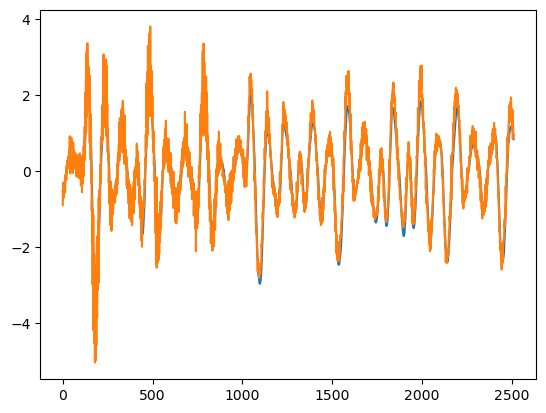

In [28]:
plt.plot(y_Pred_no_wind[:,1])
plt.plot(acc_pred[:,1])

In [29]:
f1 = model(v_10_wind[:,0])[:,0]
f2 = model(v_10_wind[:,1])[:,0]
f3 = model(v_10_wind[:,2])[:,0]
f4 = model(v_10_wind[:,0])[:,1]
f5 = model(v_10_wind[:,1])[:,1]
f6 = model(v_10_wind[:,2])[:,1]
f7 = model(Rfu_10_wind[:,0])[:,0]
f8 = model(Rfu_10_wind[:,1])[:,0]
f9 = model(Rfu_10_wind[:,2])[:,0]
f10 = model(Rfu_10_wind[:,0])[:,1]
f11 = model(Rfu_10_wind[:,1])[:,1]
f12 = model(Rfu_10_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_10_wind = torch.matmul(feature, E)

In [30]:
y_Pred_10_wind = y_Pred_10_wind.detach().numpy()
acc_pred = acc_10_wind.detach().numpy()

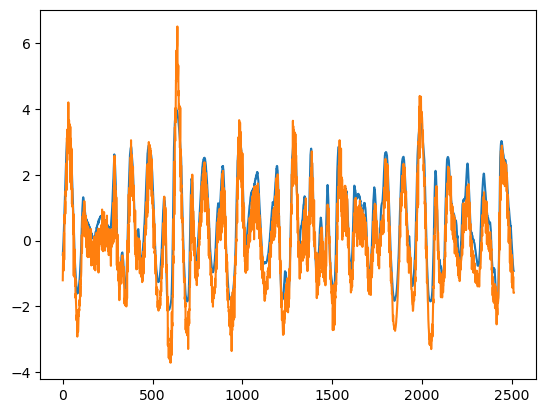

In [32]:
plt.plot(y_Pred_10_wind[:,2])
plt.plot(acc_pred[:,2])

In [45]:
f1 = model(v_20_wind[:,0])[:,0]
f2 = model(v_20_wind[:,1])[:,0]
f3 = model(v_20_wind[:,2])[:,0]
f4 = model(v_20_wind[:,0])[:,1]
f5 = model(v_20_wind[:,1])[:,1]
f6 = model(v_20_wind[:,2])[:,1]
f7 = model(Rfu_20_wind[:,0])[:,0]
f8 = model(Rfu_20_wind[:,1])[:,0]
f9 = model(Rfu_20_wind[:,2])[:,0]
f10 = model(Rfu_20_wind[:,0])[:,1]
f11 = model(Rfu_20_wind[:,1])[:,1]
f12 = model(Rfu_20_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_20_wind = torch.matmul(feature, E)

In [46]:
y_Pred_20_wind = y_Pred_20_wind.detach().numpy()
acc_pred = acc_20_wind.detach().numpy()

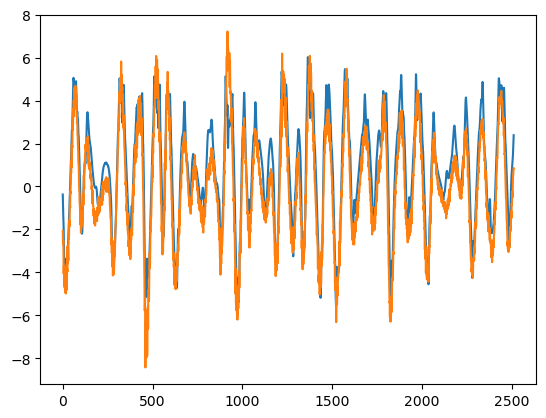

In [48]:
plt.plot(y_Pred_20_wind[:,0])
plt.plot(acc_pred[:,0])

In [50]:
f1 = model(v_50_wind[:,0])[:,0]
f2 = model(v_50_wind[:,1])[:,0]
f3 = model(v_50_wind[:,2])[:,0]
f4 = model(v_50_wind[:,0])[:,1]
f5 = model(v_50_wind[:,1])[:,1]
f6 = model(v_50_wind[:,2])[:,1]
f7 = model(Rfu_50_wind[:,0])[:,0]
f8 = model(Rfu_50_wind[:,1])[:,0]
f9 = model(Rfu_50_wind[:,2])[:,0]
f10 = model(Rfu_50_wind[:,0])[:,1]
f11 = model(Rfu_50_wind[:,1])[:,1]
f12 = model(Rfu_50_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_50_wind = torch.matmul(feature, E)

In [51]:
y_Pred_50_wind = y_Pred_50_wind.detach().numpy()
acc_pred = acc_50_wind.detach().numpy()

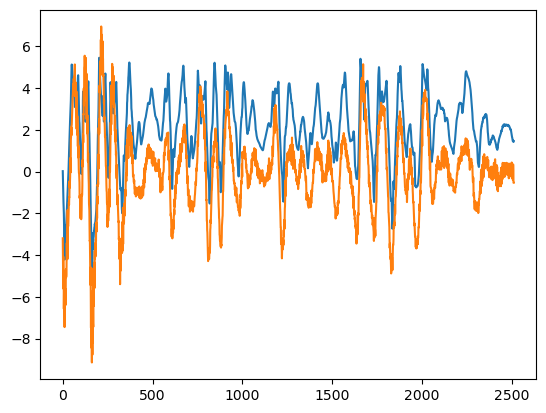

In [54]:
plt.plot(y_Pred_50_wind[:,0])
plt.plot(acc_pred[:,0])

In [33]:
f1 = model(v_b35[:,0])[:,0]
f2 = model(v_b35[:,1])[:,0]
f3 = model(v_b35[:,2])[:,0]
f4 = model(v_b35[:,0])[:,1]
f5 = model(v_b35[:,1])[:,1]
f6 = model(v_b35[:,2])[:,1]
f7 = model(Rfu_b35[:,0])[:,0]
f8 = model(Rfu_b35[:,1])[:,0]
f9 = model(Rfu_b35[:,2])[:,0]
f10 = model(Rfu_b35[:,0])[:,1]
f11 = model(Rfu_b35[:,1])[:,1]
f12 = model(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_b35 = torch.matmul(feature, E)

In [34]:
y_Pred_b35 = y_Pred_b35.detach().numpy()
acc_pred = acc_b35.detach().numpy()

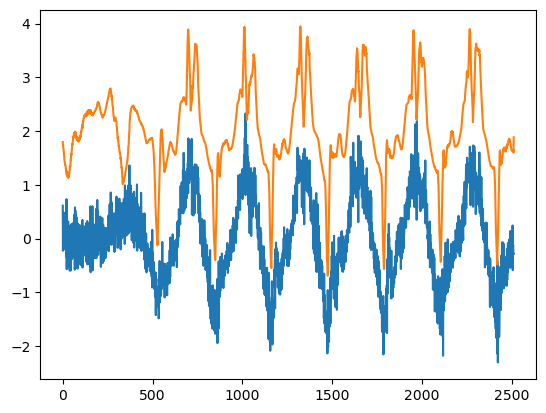

In [44]:
plt.plot(acc_pred[:,0])
plt.plot(y_Pred_b35[:,0])

### What if the DNN is not trained first on a random E

In [72]:
loss_history2 = []

model2 = Regression(1,2)

model2.apply(init_weights)

criterion = nn.MSELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=0.01)

scheduler2 = ReduceLROnPlateau(optimizer2, mode='min', factor=0.75, patience=3)

In [74]:
num_epochs = 50

#E = torch.randn(12,3)
E =  torch.zeros(12, 3)  
num_copies = E.shape[1]

E, residuals, rank, singular_values = torch.linalg.lstsq(feature, acc_no_wind)
E = torch.where(torch.abs(E) >= 1.0, E, torch.zeros_like(E))
E = E.detach()
print(E)

for epoch in range(num_epochs):
    loss = 0
    optimizer.zero_grad()  # move optimizer zero_grad() outside the inner loop
    
    f1 = model2(v_no_wind[:,0])[:,0]
    f2 = model2(v_no_wind[:,1])[:,0]
    f3 = model2(v_no_wind[:,2])[:,0]
    f4 = model2(v_no_wind[:,0])[:,1]
    f5 = model2(v_no_wind[:,1])[:,1]
    f6 = model2(v_no_wind[:,2])[:,1]
    f7 = model2(Rfu_no_wind[:,0])[:,0]
    f8 = model2(Rfu_no_wind[:,1])[:,0]
    f9 = model2(Rfu_no_wind[:,2])[:,0]
    f10 = model2(Rfu_no_wind[:,0])[:,1]
    f11 = model2(Rfu_no_wind[:,1])[:,1]
    f12 = model2(Rfu_no_wind[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    
    #if epoch% 50 == 0:

    copies_of_ftr = []
    for col_idx in range(num_copies):

        col = torch.nonzero(E[:, col_idx] == 0).squeeze()

        ftr_copy = feature.clone()
        ftr_copy[:, col] = 0

        copies_of_ftr.append(ftr_copy)

    ftr_x = copies_of_ftr[0]
    ftr_y = copies_of_ftr[1]
    ftr_z = copies_of_ftr[2]    
    
    yx = torch.matmul(ftr_x,E[:,0])
    yy = torch.matmul(ftr_y,E[:,1])
    yz = torch.matmul(ftr_z,E[:,2])

    y = torch.cat((yx.unsqueeze(1),yy.unsqueeze(1),yz.unsqueeze(1)),dim=1) 
    
    
    loss = criterion(acc_no_wind,y)
    loss.backward(retain_graph = True)
    
    
    optimizer2.step()  # move optimizer step() outside the inner loop

    loss /= len(v_no_wind)
    loss_history.append(loss)
    scheduler2.step(loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")


tensor([[ 5.5205e+01, -3.1302e+00,  2.5466e+00],
        [-9.5153e+00,  3.2794e+01, -1.4932e+01],
        [ 1.7969e+01, -3.1900e+00,  8.1398e+00],
        [ 7.5803e+01, -4.3839e+00,  2.3705e+00],
        [-1.2284e+01,  4.6499e+01, -1.9068e+01],
        [ 2.1352e+01, -4.6675e+00,  7.8602e+00],
        [ 4.1627e+03, -1.2798e+01,  2.6458e+02],
        [-3.1781e+02,  3.5358e+03,  2.9744e+02],
        [-3.9797e+03, -3.5461e+03, -4.0542e+02],
        [ 4.4956e+03, -1.2594e+01,  4.3802e+02],
        [-5.4032e+02,  3.5350e+03,  5.2001e+02],
        [-3.8322e+03, -3.3994e+03, -1.0984e+03]])
Epoch [10/50], Loss: 0.000123
Epoch [20/50], Loss: 0.000269
Epoch [30/50], Loss: 0.000213
Epoch [40/50], Loss: 0.000497
Epoch [50/50], Loss: 0.000482


In [75]:
f1 = model(v_no_wind[:,0])[:,0]
f2 = model(v_no_wind[:,1])[:,0]
f3 = model(v_no_wind[:,2])[:,0]
f4 = model(v_no_wind[:,0])[:,1]
f5 = model(v_no_wind[:,1])[:,1]
f6 = model(v_no_wind[:,2])[:,1]
f7 = model(Rfu_no_wind[:,0])[:,0]
f8 = model(Rfu_no_wind[:,1])[:,0]
f9 = model(Rfu_no_wind[:,2])[:,0]
f10 = model(Rfu_no_wind[:,0])[:,1]
f11 = model(Rfu_no_wind[:,1])[:,1]
f12 = model(Rfu_no_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_no_wind = torch.matmul(feature, E)

In [76]:
y_Pred_no_wind = y_Pred_no_wind.detach().numpy()
acc_pred = acc_no_wind.detach().numpy()

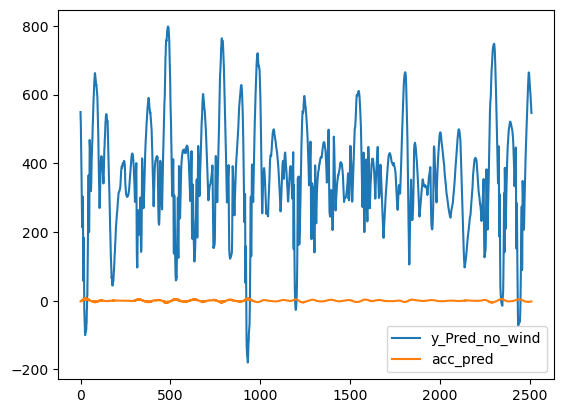

In [80]:
plt.plot(y_Pred_no_wind[:,0], label='y_Pred_no_wind')
plt.plot(acc_pred[:,0], label='acc_pred')
plt.legend()

In [81]:
f1 = model(v_50_wind[:,0])[:,0]
f2 = model(v_50_wind[:,1])[:,0]
f3 = model(v_50_wind[:,2])[:,0]
f4 = model(v_50_wind[:,0])[:,1]
f5 = model(v_50_wind[:,1])[:,1]
f6 = model(v_50_wind[:,2])[:,1]
f7 = model(Rfu_50_wind[:,0])[:,0]
f8 = model(Rfu_50_wind[:,1])[:,0]
f9 = model(Rfu_50_wind[:,2])[:,0]
f10 = model(Rfu_50_wind[:,0])[:,1]
f11 = model(Rfu_50_wind[:,1])[:,1]
f12 = model(Rfu_50_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_Pred_50_wind = torch.matmul(feature, E)

In [82]:
y_Pred_50_wind = y_Pred_50_wind.detach().numpy()
acc_pred = acc_50_wind.detach().numpy()

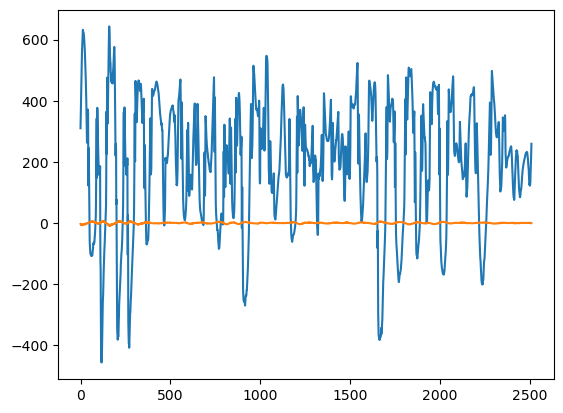

In [83]:
plt.plot(y_Pred_50_wind[:,0])
plt.plot(acc_pred[:,0])

**On Above : Poor Results, the DNN fails to capture the nature of system dynamics**

## Algorithm 1 (based on the intuition that inherent nature of system dynamics is constant)

We train the DNN forming our basis function on the no_wind dataset with a random initialization for E.

In [43]:
class Regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(Regression, self).__init__()
        self.linear1 = (nn.Linear(input_size, 8))
        self.relu1 = nn.ReLU()
        self.linear2 = (nn.Linear(8, 16))
        self.relu2 = nn.ReLU()
        self.linear3 = (nn.Linear(16, 24))
        self.relu3 = nn.ReLU()
        self.linear4 = (nn.Linear(24, 8))
        self.relu4 = nn.ReLU()
        self.linear5 = (nn.Linear(8, output_size))
    
    def forward(self, x):
        out = x
        out = out.unsqueeze(1)
        out = self.linear1(out)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        return out
    
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.zeros_(m.bias.data)

In [21]:
loss_history = []
model = Regression(1,2)

model.apply(init_weights)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.75, patience=3)

num_epochs = 250

E = torch.randn(12,3)
num_copies = E.shape[1]

for epoch in range(num_epochs):
    loss = 0
    optimizer.zero_grad()  # move optimizer zero_grad() outside the inner loop
    
    f1 = model(v_no_wind[:,0])[:,0]
    f2 = model(v_no_wind[:,1])[:,0]
    f3 = model(v_no_wind[:,2])[:,0]
    f4 = model(v_no_wind[:,0])[:,1]
    f5 = model(v_no_wind[:,1])[:,1]
    f6 = model(v_no_wind[:,2])[:,1]
    f7 = model(Rfu_no_wind[:,0])[:,0]
    f8 = model(Rfu_no_wind[:,1])[:,0]
    f9 = model(Rfu_no_wind[:,2])[:,0]
    f10 = model(Rfu_no_wind[:,0])[:,1]
    f11 = model(Rfu_no_wind[:,1])[:,1]
    f12 = model(Rfu_no_wind[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    
    y = torch.matmul(feature, E)    
    
    loss = criterion(acc_no_wind,y)
    loss.backward(retain_graph = True)
    
    optimizer.step() 

    loss /= len(v_no_wind)
    loss_history.append(loss)
    scheduler.step(loss)

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")

Epoch [10/250], Loss: 0.000810
Epoch [20/250], Loss: 0.000704
Epoch [30/250], Loss: 0.000652
Epoch [40/250], Loss: 0.000636
Epoch [50/250], Loss: 0.000623
Epoch [60/250], Loss: 0.000616
Epoch [70/250], Loss: 0.000610
Epoch [80/250], Loss: 0.000610
Epoch [90/250], Loss: 0.000602
Epoch [100/250], Loss: 0.000600
Epoch [110/250], Loss: 0.000599
Epoch [120/250], Loss: 0.000597
Epoch [130/250], Loss: 0.000595
Epoch [140/250], Loss: 0.000594
Epoch [150/250], Loss: 0.000593
Epoch [160/250], Loss: 0.000592
Epoch [170/250], Loss: 0.000591
Epoch [180/250], Loss: 0.000590
Epoch [190/250], Loss: 0.000590
Epoch [200/250], Loss: 0.000589
Epoch [210/250], Loss: 0.000588
Epoch [220/250], Loss: 0.000588
Epoch [230/250], Loss: 0.000587
Epoch [240/250], Loss: 0.000586
Epoch [250/250], Loss: 0.000584


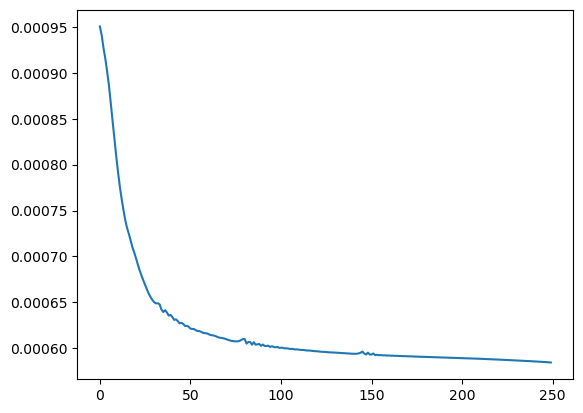

In [22]:
loss_history = np.array([tensor.item() for tensor in loss_history])
plt.plot(loss_history)

In [23]:
f1 = model(v_no_wind[:,0])[:,0]
f2 = model(v_no_wind[:,1])[:,0]
f3 = model(v_no_wind[:,2])[:,0]
f4 = model(v_no_wind[:,0])[:,1]
f5 = model(v_no_wind[:,1])[:,1]
f6 = model(v_no_wind[:,2])[:,1]
f7 = model(Rfu_no_wind[:,0])[:,0]
f8 = model(Rfu_no_wind[:,1])[:,0]
f9 = model(Rfu_no_wind[:,2])[:,0]
f10 = model(Rfu_no_wind[:,0])[:,1]
f11 = model(Rfu_no_wind[:,1])[:,1]
f12 = model(Rfu_no_wind[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

y_pred_no_wind = torch.matmul(feature, E)

y_pred_no_wind = y_pred_no_wind.detach().numpy()
acc_pred = acc_no_wind.detach().numpy()

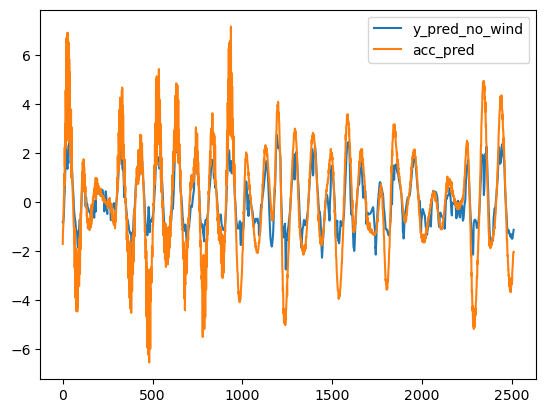

In [25]:
plt.plot(y_pred_no_wind[:,0], label='y_pred_no_wind')
plt.plot(acc_pred[:,0], label='acc_pred')
plt.legend()

Without a proper E, the dynamical prediction is poor. Now we will meta-train E on training wind datasets to make it capable of choosing and scaling appropriate weights of the dynamics DNN, while enforcing sparsity.

We define a DNN for E.

In [44]:
class RegressionE(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressionE, self).__init__()
        self.linear1 = (nn.Linear(input_size, 12))
        self.relu1 = nn.ReLU()
        self.linear2 = (nn.Linear(12, 16))
        self.relu2 = nn.ReLU()
        self.linear3 = (nn.Linear(16, 24))
        self.relu3 = nn.ReLU()
        self.linear4 = (nn.Linear(24, 16))
        self.relu4 = nn.ReLU()
        self.linear5 = (nn.Linear(16, output_size))
    
    def forward(self, x):
        out = x
        out = self.linear1(out)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        return out
    
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.zeros_(m.bias.data)

In [110]:
modelE = RegressionE(6,36)

modelE.apply(init_weights)

criterion = nn.MSELoss()
optimizerE_mu = optim.Adam(modelE.parameters(), lr=0.01)

In [112]:
num_tasks = 6
mt_batch_size = 1681
mu_batch_size = 830

for i in range(30):
    
    loss_mu = 0
    optimizerE_mu.zero_grad()

    for k in range(5):
        
        optimizerE = optim.Adam(modelE.parameters(), lr=0.005)
        schedulerE = ReduceLROnPlateau(optimizerE, mode='min', factor=0.75, patience=3)
        
        for iterate in range(0, mt.shape[0], mt_batch_size):
            loss_mt = 0
            optimizerE.zero_grad() 

            f1 = model(mt[iterate : iterate + mt_batch_size, 0])[:,0]
            f2 = model(mt[iterate : iterate + mt_batch_size, 1])[:,0]
            f3 = model(mt[iterate : iterate + mt_batch_size, 2])[:,0]
            f4 = model(mt[iterate : iterate + mt_batch_size, 0])[:,1]
            f5 = model(mt[iterate : iterate + mt_batch_size, 1])[:,1]
            f6 = model(mt[iterate : iterate + mt_batch_size, 2])[:,1]
            f7 = model(mt[iterate : iterate + mt_batch_size, 3])[:,0]
            f8 = model(mt[iterate : iterate + mt_batch_size, 4])[:,0]
            f9 = model(mt[iterate : iterate + mt_batch_size, 5])[:,0]
            f10 = model(mt[iterate : iterate + mt_batch_size, 3])[:,1]
            f11 = model(mt[iterate : iterate + mt_batch_size, 4])[:,1]
            f12 = model(mt[iterate : iterate + mt_batch_size, 5])[:,1]
            feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
            feature = feature.unsqueeze(2)
            
            #print('mt')

            E_x = modelE(mt[iterate : iterate + mt_batch_size, :])[:,0:12]
            E_y = modelE(mt[iterate : iterate + mt_batch_size, :])[:,12:24]
            E_z = modelE(mt[iterate : iterate + mt_batch_size, :])[:,24:36]

            E_x = E_x.unsqueeze(1)
            E_y = E_y.unsqueeze(1)
            E_z = E_z.unsqueeze(1)
            
            #print(modelE.state_dict())

            E = torch.cat((E_x, E_y, E_z), axis = 1)
            #print(E.requires_grad)
    
            y = torch.matmul(E, feature) 
            y = y.squeeze(2)

            loss_mt = criterion(acc_mt[iterate : iterate + mt_batch_size, :],y)
            loss_mt.backward(retain_graph = True)
            

            optimizerE.step() 
            #print("after")
            #print(modelE.state_dict())
            loss_mt /= mt_batch_size
            #print(f"loss_mt : {loss_mt}")
            loss_mt_history.append(loss_mt)
            schedulerE.step(loss_mt)
  
    for itr in range(0, mu.shape[0], mu_batch_size):
        
        f1 = model(mu[itr : itr + mu_batch_size, 0])[:,0]
        f2 = model(mu[itr : itr + mu_batch_size, 1])[:,0]
        f3 = model(mu[itr : itr + mu_batch_size, 2])[:,0]
        f4 = model(mu[itr : itr + mu_batch_size, 0])[:,1]
        f5 = model(mu[itr : itr + mu_batch_size, 1])[:,1]
        f6 = model(mu[itr : itr + mu_batch_size, 2])[:,1]
        f7 = model(mu[itr : itr + mu_batch_size, 3])[:,0]
        f8 = model(mu[itr : itr + mu_batch_size, 4])[:,0]
        f9 = model(mu[itr : itr + mu_batch_size, 5])[:,0]
        f10 = model(mu[itr : itr + mu_batch_size, 3])[:,1]
        f11 = model(mu[itr : itr + mu_batch_size, 4])[:,1]
        f12 = model(mu[itr : itr + mu_batch_size, 5])[:,1]
        feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
        feature = feature.unsqueeze(2)
        
        E_x = modelE(mu[itr : itr + mu_batch_size, :])[:,0:12]
        E_y = modelE(mu[itr : itr + mu_batch_size, :])[:,12:24]
        E_z = modelE(mu[itr : itr + mu_batch_size, :])[:,24:36]

        E_x = E_x.unsqueeze(1)
        E_y = E_y.unsqueeze(1)
        E_z = E_z.unsqueeze(1)
       
        E = torch.cat((E_x, E_y, E_z), axis = 1)
       
        y = torch.matmul(E, feature)    
        y = y.squeeze(2)
        
        loss_mu_t = criterion(acc_mu[itr : itr + mu_batch_size, :],y)
        loss_mu = loss_mu + loss_mu_t
    
    loss_mu.backward(retain_graph = True)
    #print(modelE.state_dict())
    optimizerE_mu.step()
    loss_mu /= mu.shape[0]
    print(f"{i} : loss_mu : {loss_mu}")
    #print(modelE.state_dict())
    loss_mu_history.append(loss_mu)

0 : loss_mu : 0.0013799822190776467
1 : loss_mu : 0.001203744439408183
2 : loss_mu : 0.0011763324728235602
3 : loss_mu : 0.0010913385776802897
4 : loss_mu : 0.0010363198816776276
5 : loss_mu : 0.0009475432452745736
6 : loss_mu : 0.000874204735737294
7 : loss_mu : 0.0008368128328584135
8 : loss_mu : 0.0008188460487872362
9 : loss_mu : 0.0007897961768321693
10 : loss_mu : 0.000775304448325187
11 : loss_mu : 0.0007615098729729652
12 : loss_mu : 0.0007578471559099853
13 : loss_mu : 0.0007439669570885599
14 : loss_mu : 0.0007399902679026127
15 : loss_mu : 0.0007217394886538386
16 : loss_mu : 0.0007214364013634622
17 : loss_mu : 0.0007024766528047621
18 : loss_mu : 0.0006972312112338841
19 : loss_mu : 0.000690542277880013
20 : loss_mu : 0.0006819113623350859
21 : loss_mu : 0.0006914364639669657
22 : loss_mu : 0.0006752422195859253
23 : loss_mu : 0.0006698562065139413
24 : loss_mu : 0.0006641940562985837
25 : loss_mu : 0.0006598809850402176
26 : loss_mu : 0.0006562796188518405
27 : loss_mu : 

In [114]:
checkpoint_maml2 = {
    'model_state_dict': model.state_dict(),
    'modelE_state_dict': modelE.state_dict(),

    'optimizerE_state_dict': optimizerE.state_dict(),
    'optimizerE_mu_state_dict': optimizerE_mu.state_dict(),
}
checkpoint_path_maml2 = "C:/Users/aruna/thesismaml2.pth"  # Update with the desired save path
torch.save(checkpoint_maml2, checkpoint_path_maml2)

In [116]:
modeltest = RegressionE(6, 36)
chk = torch.load("C:/Users/aruna/thesismaml2.pth")
modeltest.load_state_dict(chk['modelE_state_dict'])

<All keys matched successfully>

In [117]:
f1 = model(v_b35[:,0])[:,0]
f2 = model(v_b35[:,1])[:,0]
f3 = model(v_b35[:,2])[:,0]
f4 = model(v_b35[:,0])[:,1]
f5 = model(v_b35[:,1])[:,1]
f6 = model(v_b35[:,2])[:,1]
f7 = model(Rfu_b35[:,0])[:,0]
f8 = model(Rfu_b35[:,1])[:,0]
f9 = model(Rfu_b35[:,2])[:,0]
f10 = model(Rfu_b35[:,0])[:,1]
f11 = model(Rfu_b35[:,1])[:,1]
f12 = model(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [119]:
E_x = modelE(ip)[:,0:12]
E_y = modelE(ip)[:,12:24]
E_z = modelE(ip)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [120]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

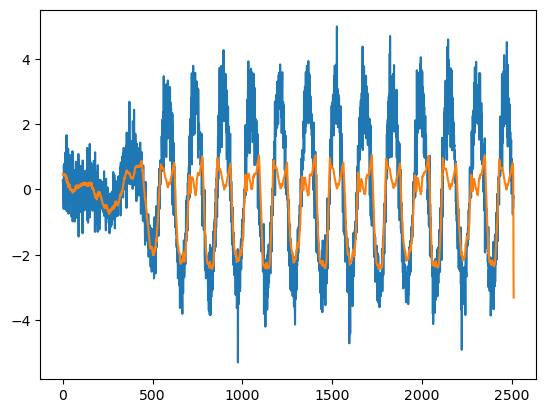

In [121]:
plt.plot(acc_pred[:,2])
plt.plot(y_pred[:,2])

In [123]:
f1 = model(v_70psin20[:,0])[:,0]
f2 = model(v_70psin20[:,1])[:,0]
f3 = model(v_70psin20[:,2])[:,0]
f4 = model(v_70psin20[:,0])[:,1]
f5 = model(v_70psin20[:,1])[:,1]
f6 = model(v_70psin20[:,2])[:,1]
f7 = model(Rfu_70psin20[:,0])[:,0]
f8 = model(Rfu_70psin20[:,1])[:,0]
f9 = model(Rfu_70psin20[:,2])[:,0]
f10 = model(Rfu_70psin20[:,0])[:,1]
f11 = model(Rfu_70psin20[:,1])[:,1]
f12 = model(Rfu_70psin20[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [124]:
E_x = modelE(ip2)[:,0:12]
E_y = modelE(ip2)[:,12:24]
E_z = modelE(ip2)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [125]:
y_pred = y.detach().numpy()
acc_pred = acc_70psin20.detach().numpy()

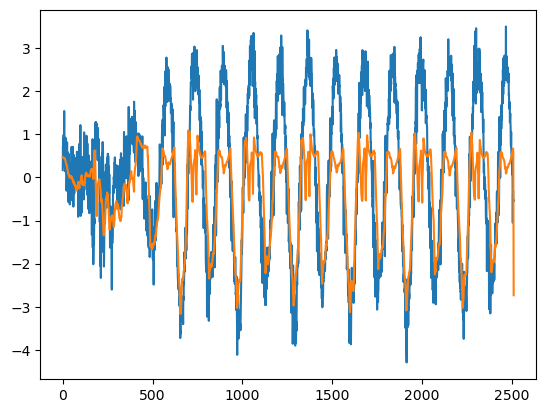

In [126]:
plt.plot(acc_pred[:,2])
plt.plot(y_pred[:,2])

In [167]:
modelE_70psin20 = RegressionE(6,36)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

modelE_70psin20.load_state_dict(chk['modelE_state_dict'])

<All keys matched successfully>

In [168]:
loss_history_70psin20n = []
optimizerE_70p = optim.Adam(modelE_70psin20.parameters(), lr=0.005)

In [171]:
num_epochs = 25

schedulerE_70p = ReduceLROnPlateau(optimizerE_70p, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    optimizerE_70p.zero_grad() 
    
    f1 = model(v_70psin20[:,0])[:,0]
    f2 = model(v_70psin20[:,1])[:,0]
    f3 = model(v_70psin20[:,2])[:,0]
    f4 = model(v_70psin20[:,0])[:,1]
    f5 = model(v_70psin20[:,1])[:,1]
    f6 = model(v_70psin20[:,2])[:,1]
    f7 = model(Rfu_70psin20[:,0])[:,0]
    f8 = model(Rfu_70psin20[:,1])[:,0]
    f9 = model(Rfu_70psin20[:,2])[:,0]
    f10 = model(Rfu_70psin20[:,0])[:,1]
    f11 = model(Rfu_70psin20[:,1])[:,1]
    f12 = model(Rfu_70psin20[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_70psin20(ip2)[:,0:12]
    E_y = modelE_70psin20(ip2)[:,12:24]
    E_z = modelE_70psin20(ip2)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_70psin20,y)
    loss.backward(retain_graph = True)
    
    
    optimizerE_70p.step() 
    schedulerE_70p.step(loss)

    loss /= len(v_no_wind)
    loss_history_70psin20n.append(loss)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/25], Loss: 0.000088
Epoch [2/25], Loss: 0.000087
Epoch [3/25], Loss: 0.000086
Epoch [4/25], Loss: 0.000085
Epoch [5/25], Loss: 0.000085
Epoch [6/25], Loss: 0.000084
Epoch [7/25], Loss: 0.000083
Epoch [8/25], Loss: 0.000082
Epoch [9/25], Loss: 0.000081
Epoch [10/25], Loss: 0.000081
Epoch [11/25], Loss: 0.000080
Epoch [12/25], Loss: 0.000079
Epoch [13/25], Loss: 0.000078
Epoch [14/25], Loss: 0.000078
Epoch [15/25], Loss: 0.000077
Epoch [16/25], Loss: 0.000076
Epoch [17/25], Loss: 0.000076
Epoch [18/25], Loss: 0.000075
Epoch [19/25], Loss: 0.000074
Epoch [20/25], Loss: 0.000074
Epoch [21/25], Loss: 0.000073
Epoch [22/25], Loss: 0.000072
Epoch [23/25], Loss: 0.000072
Epoch [24/25], Loss: 0.000071
Epoch [25/25], Loss: 0.000070


In [172]:
f1 = model(v_70psin20[:,0])[:,0]
f2 = model(v_70psin20[:,1])[:,0]
f3 = model(v_70psin20[:,2])[:,0]
f4 = model(v_70psin20[:,0])[:,1]
f5 = model(v_70psin20[:,1])[:,1]
f6 = model(v_70psin20[:,2])[:,1]
f7 = model(Rfu_70psin20[:,0])[:,0]
f8 = model(Rfu_70psin20[:,1])[:,0]
f9 = model(Rfu_70psin20[:,2])[:,0]
f10 = model(Rfu_70psin20[:,0])[:,1]
f11 = model(Rfu_70psin20[:,1])[:,1]
f12 = model(Rfu_70psin20[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [173]:
E_x = modelE_70psin20(ip2)[:,0:12]
E_y = modelE_70psin20(ip2)[:,12:24]
E_z = modelE_70psin20(ip2)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [174]:
y_pred = y.detach().numpy()
acc_pred = acc_70psin20.detach().numpy()

<function matplotlib.pyplot.show(close=None, block=None)>

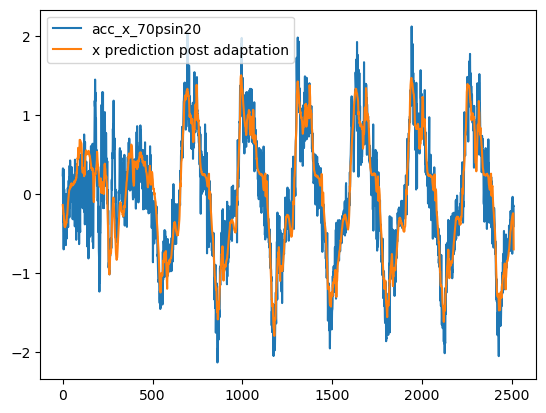

In [177]:
plt.plot(acc_pred[:,0],label = 'acc_x_70psin20')
plt.plot(y_pred[:,0],label = 'x prediction post adaptation')
plt.legend()
plt.savefig('C:/Users/aruna/Downloads/MAML/70psin20x')
plt.show

In [35]:
modelE_b35 = RegressionE(6,36)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

modelE_b35.load_state_dict(chk['modelE_state_dict'])


<All keys matched successfully>

In [142]:
loss_history_b35 = []
optimizerE_b35 = optim.Adam(modelE_b35.parameters(), lr=0.005)

In [145]:
epoch = 20
schedulerE_b35 = ReduceLROnPlateau(optimizerE_b35, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    optimizerE_b35.zero_grad() 
    
    f1 = model(v_b35[:,0])[:,0]
    f2 = model(v_b35[:,1])[:,0]
    f3 = model(v_b35[:,2])[:,0]
    f4 = model(v_b35[:,0])[:,1]
    f5 = model(v_b35[:,1])[:,1]
    f6 = model(v_b35[:,2])[:,1]
    f7 = model(Rfu_b35[:,0])[:,0]
    f8 = model(Rfu_b35[:,1])[:,0]
    f9 = model(Rfu_b35[:,2])[:,0]
    f10 = model(Rfu_b35[:,0])[:,1]
    f11 = model(Rfu_b35[:,1])[:,1]
    f12 = model(Rfu_b35[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b35(ip)[:,0:12]
    E_y = modelE_b35(ip)[:,12:24]
    E_z = modelE_b35(ip)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b35,y)
    loss.backward(retain_graph = True)
    
    optimizerE_b35.step() 
    schedulerE_b35.step(loss)

    loss /= len(v_no_wind)
    loss_history_b35.append(loss)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/30], Loss: 0.000081
Epoch [2/30], Loss: 0.000080
Epoch [3/30], Loss: 0.000079
Epoch [4/30], Loss: 0.000078
Epoch [5/30], Loss: 0.000078
Epoch [6/30], Loss: 0.000077
Epoch [7/30], Loss: 0.000077
Epoch [8/30], Loss: 0.000076
Epoch [9/30], Loss: 0.000076
Epoch [10/30], Loss: 0.000075
Epoch [11/30], Loss: 0.000074
Epoch [12/30], Loss: 0.000074
Epoch [13/30], Loss: 0.000074
Epoch [14/30], Loss: 0.000074
Epoch [15/30], Loss: 0.000073
Epoch [16/30], Loss: 0.000073
Epoch [17/30], Loss: 0.000072
Epoch [18/30], Loss: 0.000072
Epoch [19/30], Loss: 0.000072
Epoch [20/30], Loss: 0.000071
Epoch [21/30], Loss: 0.000071
Epoch [22/30], Loss: 0.000071
Epoch [23/30], Loss: 0.000071
Epoch [24/30], Loss: 0.000070
Epoch [25/30], Loss: 0.000070
Epoch [26/30], Loss: 0.000070
Epoch [27/30], Loss: 0.000070
Epoch [28/30], Loss: 0.000070
Epoch [29/30], Loss: 0.000069
Epoch [30/30], Loss: 0.000069


In [36]:
f1 = model(v_b35[:,0])[:,0]
f2 = model(v_b35[:,1])[:,0]
f3 = model(v_b35[:,2])[:,0]
f4 = model(v_b35[:,0])[:,1]
f5 = model(v_b35[:,1])[:,1]
f6 = model(v_b35[:,2])[:,1]
f7 = model(Rfu_b35[:,0])[:,0]
f8 = model(Rfu_b35[:,1])[:,0]
f9 = model(Rfu_b35[:,2])[:,0]
f10 = model(Rfu_b35[:,0])[:,1]
f11 = model(Rfu_b35[:,1])[:,1]
f12 = model(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [37]:
E_x = modelE_b35(ip)[:,0:12]
E_y = modelE_b35(ip)[:,12:24]
E_z = modelE_b35(ip)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [148]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

<function matplotlib.pyplot.show(close=None, block=None)>

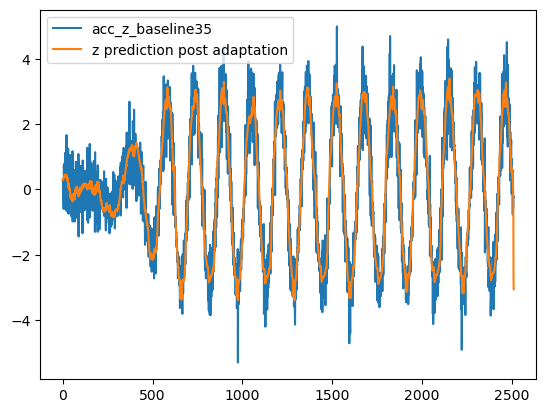

In [159]:
plt.plot(acc_pred[:,2],label = 'acc_z_baseline35')
plt.plot(y_pred[:,2],label = 'z prediction post adaptation')
plt.legend()
plt.savefig('C:/Users/aruna/Downloads/MAML/baseline35z')
plt.show()

### Model training to induce sparsity of E

In [23]:
model = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

model.load_state_dict(chk['model_state_dict'])

<All keys matched successfully>

In [73]:
modelEsp = RegressionE(6,36)

modelEsp.apply(init_weights)

criterion = nn.MSELoss()
optimizerE_musp = optim.Adam(modelEsp.parameters(), lr=0.005)

In [46]:
loss_mt_sp = []
loss_mu_sp = []

In [65]:
num_tasks = 6
mt_batch_size = 1681
mu_batch_size = 830

for i in range(50):
    
    loss_mu = 0
    optimizerE_musp.zero_grad()

    for k in range(5):
        
        optimizerEsp = optim.Adam(modelEsp.parameters(), lr=0.0025)
        schedulerEsp = ReduceLROnPlateau(optimizerEsp, mode='min', factor=0.75, patience=3)
        
        for iterate in range(0, mt.shape[0], mt_batch_size):
            loss_mt = 0
            optimizerEsp.zero_grad() 

            f1 = model(mt[iterate : iterate + mt_batch_size, 0])[:,0]
            f2 = model(mt[iterate : iterate + mt_batch_size, 1])[:,0]
            f3 = model(mt[iterate : iterate + mt_batch_size, 2])[:,0]
            f4 = model(mt[iterate : iterate + mt_batch_size, 0])[:,1]
            f5 = model(mt[iterate : iterate + mt_batch_size, 1])[:,1]
            f6 = model(mt[iterate : iterate + mt_batch_size, 2])[:,1]
            f7 = model(mt[iterate : iterate + mt_batch_size, 3])[:,0]
            f8 = model(mt[iterate : iterate + mt_batch_size, 4])[:,0]
            f9 = model(mt[iterate : iterate + mt_batch_size, 5])[:,0]
            f10 = model(mt[iterate : iterate + mt_batch_size, 3])[:,1]
            f11 = model(mt[iterate : iterate + mt_batch_size, 4])[:,1]
            f12 = model(mt[iterate : iterate + mt_batch_size, 5])[:,1]
            feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
            feature = feature.unsqueeze(2)
            
            #print('mt')

            E_x = modelEsp(mt[iterate : iterate + mt_batch_size, :])[:,0:12]
            E_y = modelEsp(mt[iterate : iterate + mt_batch_size, :])[:,12:24]
            E_z = modelEsp(mt[iterate : iterate + mt_batch_size, :])[:,24:36]

            E_x = E_x.unsqueeze(1)
            E_y = E_y.unsqueeze(1)
            E_z = E_z.unsqueeze(1)
            
            #print(modelE.state_dict())

            E = torch.cat((E_x, E_y, E_z), axis = 1)
            #print(E.requires_grad)
            E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    
            y = torch.matmul(E, feature) 
            y = y.squeeze(2)

            loss_mt = criterion(acc_mt[iterate : iterate + mt_batch_size, :],y)
            loss_mt.backward(retain_graph = True)
            

            optimizerEsp.step() 
            #print("after")
            #print(modelE.state_dict())
            loss_mt /= mt_batch_size
            #print(f"loss_mt : {loss_mt}")
            loss_mt_sp.append(loss_mt)
            schedulerEsp.step(loss_mt)
  
    for itr in range(0, mu.shape[0], mu_batch_size):
        
        f1 = model(mu[itr : itr + mu_batch_size, 0])[:,0]
        f2 = model(mu[itr : itr + mu_batch_size, 1])[:,0]
        f3 = model(mu[itr : itr + mu_batch_size, 2])[:,0]
        f4 = model(mu[itr : itr + mu_batch_size, 0])[:,1]
        f5 = model(mu[itr : itr + mu_batch_size, 1])[:,1]
        f6 = model(mu[itr : itr + mu_batch_size, 2])[:,1]
        f7 = model(mu[itr : itr + mu_batch_size, 3])[:,0]
        f8 = model(mu[itr : itr + mu_batch_size, 4])[:,0]
        f9 = model(mu[itr : itr + mu_batch_size, 5])[:,0]
        f10 = model(mu[itr : itr + mu_batch_size, 3])[:,1]
        f11 = model(mu[itr : itr + mu_batch_size, 4])[:,1]
        f12 = model(mu[itr : itr + mu_batch_size, 5])[:,1]
        feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
        feature = feature.unsqueeze(2)
        
        E_x = modelEsp(mu[itr : itr + mu_batch_size, :])[:,0:12]
        E_y = modelEsp(mu[itr : itr + mu_batch_size, :])[:,12:24]
        E_z = modelEsp(mu[itr : itr + mu_batch_size, :])[:,24:36]

        E_x = E_x.unsqueeze(1)
        E_y = E_y.unsqueeze(1)
        E_z = E_z.unsqueeze(1)
       
        E = torch.cat((E_x, E_y, E_z), axis = 1)
        E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
       
        y = torch.matmul(E, feature)    
        y = y.squeeze(2)
        
        loss_mu_t = criterion(acc_mu[itr : itr + mu_batch_size, :],y)
        loss_mu = loss_mu + loss_mu_t
    
    loss_mu.backward(retain_graph = True)
    #print(modelE.state_dict())
    optimizerE_musp.step()
    loss_mu /= mu.shape[0]
    print(f"{i} : loss_mu : {loss_mu}")
    #print(modelE.state_dict())
    loss_mu_sp.append(loss_mu)

In [52]:
# sparsity threshold = 0.1
checkpoint_maml_sparse = {
    'modelEsp_state_dict': modelEsp.state_dict(),

    'optimizerEsp_state_dict': optimizerEsp.state_dict(),
    'optimizerE_musp_state_dict': optimizerE_musp.state_dict(),
}
checkpoint_path_sparse = "C:/Users/aruna/thesis_maml_sparse.pth"  # Update with the desired save path
torch.save(checkpoint_maml_sparse, checkpoint_path_sparse)

In [75]:
# sparsity threshold = 0.25
checkpoint_maml_sparse2 = {
    'modelEsp_state_dict2': modelEsp.state_dict(),

    'optimizerEsp_state_dict2': optimizerEsp.state_dict(),
    'optimizerE_musp_state_dict2': optimizerE_musp.state_dict(),
}
checkpoint_path_sparse2 = "C:/Users/aruna/thesis_maml_sparse2.pth"  # Update with the desired save path
torch.save(checkpoint_maml_sparse2, checkpoint_path_sparse2)

In [78]:
modelE_b35sp = RegressionE(6,36)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse2.pth")

modelE_b35sp.load_state_dict(chk['modelEsp_state_dict2'])

<All keys matched successfully>

In [79]:
optimizerE_b35 = optim.Adam(modelE_b35sp.parameters(), lr=0.0025)

In [81]:
num_epochs = 50
schedulerE_b35 = ReduceLROnPlateau(optimizerE_b35, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    optimizerE_b35.zero_grad() 
    
    f1 = model(v_b35[:,0])[:,0]
    f2 = model(v_b35[:,1])[:,0]
    f3 = model(v_b35[:,2])[:,0]
    f4 = model(v_b35[:,0])[:,1]
    f5 = model(v_b35[:,1])[:,1]
    f6 = model(v_b35[:,2])[:,1]
    f7 = model(Rfu_b35[:,0])[:,0]
    f8 = model(Rfu_b35[:,1])[:,0]
    f9 = model(Rfu_b35[:,2])[:,0]
    f10 = model(Rfu_b35[:,0])[:,1]
    f11 = model(Rfu_b35[:,1])[:,1]
    f12 = model(Rfu_b35[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b35sp(ip)[:,0:12]
    E_y = modelE_b35sp(ip)[:,12:24]
    E_z = modelE_b35sp(ip)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b35,y)
    loss.backward(retain_graph = True)
    
    optimizerE_b35.step() 
    schedulerE_b35.step(loss)

    loss /= len(v_no_wind)
    loss_history_b35sp.append(loss)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/50], Loss: 0.000160
Epoch [2/50], Loss: 0.000157
Epoch [3/50], Loss: 0.000156
Epoch [4/50], Loss: 0.000155
Epoch [5/50], Loss: 0.000156
Epoch [6/50], Loss: 0.000155
Epoch [7/50], Loss: 0.000155
Epoch [8/50], Loss: 0.000152
Epoch [9/50], Loss: 0.000149
Epoch [10/50], Loss: 0.000147
Epoch [11/50], Loss: 0.000144
Epoch [12/50], Loss: 0.000142
Epoch [13/50], Loss: 0.000140
Epoch [14/50], Loss: 0.000139
Epoch [15/50], Loss: 0.000136
Epoch [16/50], Loss: 0.000133
Epoch [17/50], Loss: 0.000134
Epoch [18/50], Loss: 0.000133
Epoch [19/50], Loss: 0.000132
Epoch [20/50], Loss: 0.000130
Epoch [21/50], Loss: 0.000129
Epoch [22/50], Loss: 0.000127
Epoch [23/50], Loss: 0.000126
Epoch [24/50], Loss: 0.000124
Epoch [25/50], Loss: 0.000123
Epoch [26/50], Loss: 0.000122
Epoch [27/50], Loss: 0.000120
Epoch [28/50], Loss: 0.000119
Epoch [29/50], Loss: 0.000117
Epoch [30/50], Loss: 0.000115
Epoch [31/50], Loss: 0.000113
Epoch [32/50], Loss: 0.000111
Epoch [33/50], Loss: 0.000109
Epoch [34/50], Loss

In [114]:
f1 = model(v_b35[:,0])[:,0]
f2 = model(v_b35[:,1])[:,0]
f3 = model(v_b35[:,2])[:,0]
f4 = model(v_b35[:,0])[:,1]
f5 = model(v_b35[:,1])[:,1]
f6 = model(v_b35[:,2])[:,1]
f7 = model(Rfu_b35[:,0])[:,0]
f8 = model(Rfu_b35[:,1])[:,0]
f9 = model(Rfu_b35[:,2])[:,0]
f10 = model(Rfu_b35[:,0])[:,1]
f11 = model(Rfu_b35[:,1])[:,1]
f12 = model(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [115]:
E_x = modelE_b35sp(ip)[:,0:12]
E_y = modelE_b35sp(ip)[:,12:24]
E_z = modelE_b35sp(ip)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [116]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

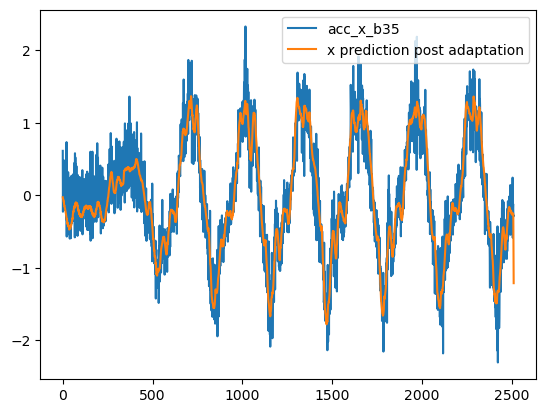

In [119]:
plt.plot(acc_pred[:,0],label = 'acc_x_b35')
plt.plot(y_pred[:,0],label = 'x prediction post adaptation')
plt.legend()
plt.savefig('C:/Users/aruna/Downloads/MAML/baseline35sparsex')
plt.show()

In [91]:
modelE_70psp = RegressionE(6,36)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse2.pth")

modelE_70psp.load_state_dict(chk['modelEsp_state_dict2'])

<All keys matched successfully>

In [92]:
optimizerE_70psp = optim.Adam(modelE_70psp.parameters(), lr=0.0025)

In [94]:
num_epochs = 50

schedulerE_70psp = ReduceLROnPlateau(optimizerE_70psp, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    optimizerE_70psp.zero_grad() 
    
    f1 = model(v_70psin20[:,0])[:,0]
    f2 = model(v_70psin20[:,1])[:,0]
    f3 = model(v_70psin20[:,2])[:,0]
    f4 = model(v_70psin20[:,0])[:,1]
    f5 = model(v_70psin20[:,1])[:,1]
    f6 = model(v_70psin20[:,2])[:,1]
    f7 = model(Rfu_70psin20[:,0])[:,0]
    f8 = model(Rfu_70psin20[:,1])[:,0]
    f9 = model(Rfu_70psin20[:,2])[:,0]
    f10 = model(Rfu_70psin20[:,0])[:,1]
    f11 = model(Rfu_70psin20[:,1])[:,1]
    f12 = model(Rfu_70psin20[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_70psp(ip2)[:,0:12]
    E_y = modelE_70psp(ip2)[:,12:24]
    E_z = modelE_70psp(ip2)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_70psin20,y)
    loss.backward(retain_graph = True)
    
    
    optimizerE_70psp.step() 
    schedulerE_70psp.step(loss)

    loss /= len(v_no_wind)
    loss_history_70psp.append(loss)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/50], Loss: 0.000201
Epoch [2/50], Loss: 0.000199
Epoch [3/50], Loss: 0.000198
Epoch [4/50], Loss: 0.000197
Epoch [5/50], Loss: 0.000196
Epoch [6/50], Loss: 0.000196
Epoch [7/50], Loss: 0.000195
Epoch [8/50], Loss: 0.000194
Epoch [9/50], Loss: 0.000193
Epoch [10/50], Loss: 0.000193
Epoch [11/50], Loss: 0.000192
Epoch [12/50], Loss: 0.000191
Epoch [13/50], Loss: 0.000190
Epoch [14/50], Loss: 0.000189
Epoch [15/50], Loss: 0.000187
Epoch [16/50], Loss: 0.000186
Epoch [17/50], Loss: 0.000185
Epoch [18/50], Loss: 0.000184
Epoch [19/50], Loss: 0.000183
Epoch [20/50], Loss: 0.000183
Epoch [21/50], Loss: 0.000182
Epoch [22/50], Loss: 0.000182
Epoch [23/50], Loss: 0.000181
Epoch [24/50], Loss: 0.000181
Epoch [25/50], Loss: 0.000180
Epoch [26/50], Loss: 0.000180
Epoch [27/50], Loss: 0.000179
Epoch [28/50], Loss: 0.000178
Epoch [29/50], Loss: 0.000177
Epoch [30/50], Loss: 0.000176
Epoch [31/50], Loss: 0.000175
Epoch [32/50], Loss: 0.000175
Epoch [33/50], Loss: 0.000174
Epoch [34/50], Loss

In [120]:
f1 = model(v_70psin20[:,0])[:,0]
f2 = model(v_70psin20[:,1])[:,0]
f3 = model(v_70psin20[:,2])[:,0]
f4 = model(v_70psin20[:,0])[:,1]
f5 = model(v_70psin20[:,1])[:,1]
f6 = model(v_70psin20[:,2])[:,1]
f7 = model(Rfu_70psin20[:,0])[:,0]
f8 = model(Rfu_70psin20[:,1])[:,0]
f9 = model(Rfu_70psin20[:,2])[:,0]
f10 = model(Rfu_70psin20[:,0])[:,1]
f11 = model(Rfu_70psin20[:,1])[:,1]
f12 = model(Rfu_70psin20[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [121]:
E_x = modelE_70psp(ip2)[:,0:12]
E_y = modelE_70psp(ip2)[:,12:24]
E_z = modelE_70psp(ip2)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [122]:
y_pred = y.detach().numpy()
acc_pred = acc_70psin20.detach().numpy()

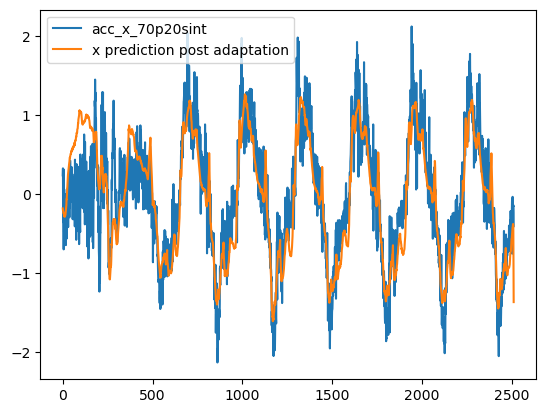

In [125]:
plt.plot(acc_pred[:,0],label = 'acc_x_70p20sint')
plt.plot(y_pred[:,0],label = 'x prediction post adaptation')
plt.legend()
plt.savefig('C:/Users/aruna/Downloads/MAML/70p20sintsparsex')
plt.show()

### Improving the training loop

In [46]:
model = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

model.load_state_dict(chk['model_state_dict'])

<All keys matched successfully>

In [76]:
modelEsp2 = RegressionE(6,36)

modelEsp2.apply(init_weights)

criterion = nn.MSELoss()
optimizerE_musp2 = optim.Adam(modelEsp2.parameters(), lr=0.005)

In [78]:
loss_mt_sp2.clear()
loss_mu_sp2.clear()

loss_mt_sp2 = []
loss_mu_sp2 = []

In [66]:
num_tasks = 6
mt_batch_size = 1681
mu_batch_size = 830
sample_size_mt = 1200
sample_size_mu = 600

for i in range(200):
    
    loss_mu = 0
    optimizerE_musp2.zero_grad()

    for k in range(5):
        
        optimizerEsp2 = optim.Adam(modelEsp2.parameters(), lr=0.0025)
        schedulerEsp2 = ReduceLROnPlateau(optimizerEsp2, mode='min', factor=0.75, patience=3)
        
        for iterate in range(0, mt.shape[0], mt_batch_size):
            
            batch_indices = list(range(iterate, iterate + mt_batch_size))
            random.shuffle(batch_indices)
            sample_indices = batch_indices[:sample_size_mt]
            
            loss_mt = 0
            optimizerEsp2.zero_grad() 

            f1 = model(mt[sample_indices, 0])[:,0]
            f2 = model(mt[sample_indices, 1])[:,0]
            f3 = model(mt[sample_indices, 2])[:,0]
            f4 = model(mt[sample_indices, 0])[:,1]
            f5 = model(mt[sample_indices, 1])[:,1]
            f6 = model(mt[sample_indices, 2])[:,1]
            f7 = model(mt[sample_indices, 3])[:,0]
            f8 = model(mt[sample_indices, 4])[:,0]
            f9 = model(mt[sample_indices, 5])[:,0]
            f10 = model(mt[sample_indices, 3])[:,1]
            f11 = model(mt[sample_indices, 4])[:,1]
            f12 = model(mt[sample_indices, 5])[:,1]
            feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
            feature = feature.unsqueeze(2)
            
            #print('mt')

            E_x = modelEsp2(mt[sample_indices, :])[:,0:12]
            E_y = modelEsp2(mt[sample_indices, :])[:,12:24]
            E_z = modelEsp2(mt[sample_indices, :])[:,24:36]

            E_x = E_x.unsqueeze(1)
            E_y = E_y.unsqueeze(1)
            E_z = E_z.unsqueeze(1)
            
            #print(modelE.state_dict())

            E = torch.cat((E_x, E_y, E_z), axis = 1)
            #print(E.requires_grad)
            #E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    
            y = torch.matmul(E, feature) 
            y = y.squeeze(2)

            loss_mt = criterion(acc_mt[sample_indices, :],y)
            loss_mt.backward(retain_graph = True)
            
            optimizerEsp2.step() 
            #print("after")
            #print(modelE.state_dict())
            loss_mt /= sample_size_mt
            #print(f"loss_mt : {loss_mt}")
            loss_mt_sp2.append(loss_mt)
            schedulerEsp2.step(loss_mt)

  
    for itr in range(0, mu.shape[0], mu_batch_size):
        
        batch_indices2 = list(range(itr, itr + mu_batch_size))
        random.shuffle(batch_indices2)
        sample_indices2 = batch_indices2[:sample_size_mu]
        
        f1 = model(mu[sample_indices2, 0])[:,0]
        f2 = model(mu[sample_indices2, 1])[:,0]
        f3 = model(mu[sample_indices2, 2])[:,0]
        f4 = model(mu[sample_indices2, 0])[:,1]
        f5 = model(mu[sample_indices2, 1])[:,1]
        f6 = model(mu[sample_indices2, 2])[:,1]
        f7 = model(mu[sample_indices2, 3])[:,0]
        f8 = model(mu[sample_indices2, 4])[:,0]
        f9 = model(mu[sample_indices2, 5])[:,0]
        f10 = model(mu[sample_indices2, 3])[:,1]
        f11 = model(mu[sample_indices2, 4])[:,1]
        f12 = model(mu[sample_indices2, 5])[:,1]
        feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
        feature = feature.unsqueeze(2)
        
        E_x = modelEsp2(mu[sample_indices2, :])[:,0:12]
        E_y = modelEsp2(mu[sample_indices2, :])[:,12:24]
        E_z = modelEsp2(mu[sample_indices2, :])[:,24:36]

        E_x = E_x.unsqueeze(1)
        E_y = E_y.unsqueeze(1)
        E_z = E_z.unsqueeze(1)
       
        E = torch.cat((E_x, E_y, E_z), axis = 1)
        
        E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
        #print(E)
        y = torch.matmul(E, feature)    
        y = y.squeeze(2)
        
        loss_mu_t = criterion(acc_mu[sample_indices2, :],y)
        loss_mu = loss_mu + loss_mu_t

    
    loss_mu.backward(retain_graph = True)
    #print(modelE.state_dict())
    optimizerE_musp2.step()
    loss_mu /= (sample_size_mu * num_tasks)
    print(f"{i} : loss_mu : {loss_mu}")
    #print(modelE.state_dict())
    loss_mu_sp2.append(loss_mu)
    
    # shuffling doesn't work well

In [80]:
# sparsity threshold = 0.25
checkpoint_maml_sparse3 = {
    'modelEsp_state_dict3': modelEsp2.state_dict(),

    'optimizerEsp_state_dict3': optimizerEsp2.state_dict(),
    'optimizerE_musp_state_dict3': optimizerE_musp2.state_dict(),
}
checkpoint_path_sparse3 = "C:/Users/aruna/thesis_maml_sparse3.pth"  # Update with the desired save path
torch.save(checkpoint_maml_sparse3, checkpoint_path_sparse3)

In [81]:
modelE_b35sp2 = RegressionE(6,36)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse3.pth")

modelE_b35sp2.load_state_dict(chk['modelEsp_state_dict3'])

<All keys matched successfully>

In [82]:
optimizerE_b352 = optim.Adam(modelE_b35sp2.parameters(), lr=0.0025)

In [83]:
num_epochs = 50
schedulerE_b352 = ReduceLROnPlateau(optimizerE_b352, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    optimizerE_b352.zero_grad() 
    
    f1 = model(v_b35[:,0])[:,0]
    f2 = model(v_b35[:,1])[:,0]
    f3 = model(v_b35[:,2])[:,0]
    f4 = model(v_b35[:,0])[:,1]
    f5 = model(v_b35[:,1])[:,1]
    f6 = model(v_b35[:,2])[:,1]
    f7 = model(Rfu_b35[:,0])[:,0]
    f8 = model(Rfu_b35[:,1])[:,0]
    f9 = model(Rfu_b35[:,2])[:,0]
    f10 = model(Rfu_b35[:,0])[:,1]
    f11 = model(Rfu_b35[:,1])[:,1]
    f12 = model(Rfu_b35[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b35sp2(ip)[:,0:12]
    E_y = modelE_b35sp2(ip)[:,12:24]
    E_z = modelE_b35sp2(ip)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b35,y)
    loss.backward(retain_graph = True)
    
    optimizerE_b352.step() 
    schedulerE_b352.step(loss)

    loss /= len(v_no_wind)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/50], Loss: 0.000485
Epoch [2/50], Loss: 0.000352
Epoch [3/50], Loss: 0.000281
Epoch [4/50], Loss: 0.000245
Epoch [5/50], Loss: 0.000230
Epoch [6/50], Loss: 0.000238
Epoch [7/50], Loss: 0.000248
Epoch [8/50], Loss: 0.000250
Epoch [9/50], Loss: 0.000244
Epoch [10/50], Loss: 0.000233
Epoch [11/50], Loss: 0.000224
Epoch [12/50], Loss: 0.000215
Epoch [13/50], Loss: 0.000207
Epoch [14/50], Loss: 0.000202
Epoch [15/50], Loss: 0.000198
Epoch [16/50], Loss: 0.000196
Epoch [17/50], Loss: 0.000196
Epoch [18/50], Loss: 0.000196
Epoch [19/50], Loss: 0.000195
Epoch [20/50], Loss: 0.000194
Epoch [21/50], Loss: 0.000193
Epoch [22/50], Loss: 0.000191
Epoch [23/50], Loss: 0.000189
Epoch [24/50], Loss: 0.000187
Epoch [25/50], Loss: 0.000185
Epoch [26/50], Loss: 0.000183
Epoch [27/50], Loss: 0.000181
Epoch [28/50], Loss: 0.000179
Epoch [29/50], Loss: 0.000178
Epoch [30/50], Loss: 0.000177
Epoch [31/50], Loss: 0.000175
Epoch [32/50], Loss: 0.000174
Epoch [33/50], Loss: 0.000173
Epoch [34/50], Loss

In [84]:
f1 = model(v_b35[:,0])[:,0]
f2 = model(v_b35[:,1])[:,0]
f3 = model(v_b35[:,2])[:,0]
f4 = model(v_b35[:,0])[:,1]
f5 = model(v_b35[:,1])[:,1]
f6 = model(v_b35[:,2])[:,1]
f7 = model(Rfu_b35[:,0])[:,0]
f8 = model(Rfu_b35[:,1])[:,0]
f9 = model(Rfu_b35[:,2])[:,0]
f10 = model(Rfu_b35[:,0])[:,1]
f11 = model(Rfu_b35[:,1])[:,1]
f12 = model(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [85]:
E_x = modelE_b35sp2(ip)[:,0:12]
E_y = modelE_b35sp2(ip)[:,12:24]
E_z = modelE_b35sp2(ip)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [86]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

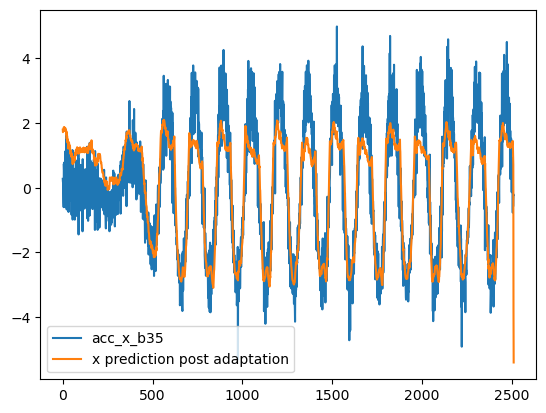

In [89]:
plt.plot(acc_pred[:,2],label = 'acc_x_b35')
plt.plot(y_pred[:,2],label = 'x prediction post adaptation')
plt.legend()
#plt.savefig('C:/Users/aruna/Downloads/MAML/baseline35sparsex')
plt.show()

## Approach 2 - Meta-Learning both the basis function and E

In [95]:
model = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

model.load_state_dict(chk['model_state_dict'])
optimizer_basis = optim.Adam(model.parameters(), lr = 0.004)

In [89]:
modelEsp3 = RegressionE(12,36)

modelEsp3.apply(init_weights)

criterion = nn.MSELoss()
optimizerE_musp3 = optim.Adam(modelEsp3.parameters(), lr=0.004)
loss_mu_sp3.clear()
loss_mu_sp3 = []

In [97]:
num_tasks = 6
mt_batch_size = 1681
mu_batch_size = 830

for i in range(100):
    
    loss_mu = 0
    
    if i%2 == 0:
        optimizerE_musp3.zero_grad()
    else:
        optimizer_basis.zero_grad()

    for k in range(5):
        
        optimizerEsp3 = optim.Adam(modelEsp3.parameters(), lr=0.002)
        schedulerEsp3 = ReduceLROnPlateau(optimizerEsp3, mode='min', factor=0.75, patience=3)
        
        optib =  optim.Adam(model.parameters(), lr = 0.002)
        schedulerb = ReduceLROnPlateau(optib, mode='min', factor=0.75, patience=3)
        
        for iterate in range(0, mt.shape[0], mt_batch_size):
            loss_mt = 0
            
            if i%2 == 0:
                optimizerEsp3.zero_grad() 
            else:
                optib.zero_grad()

            f1 = model(mt[iterate : iterate + mt_batch_size, 0])[:,0]
            f2 = model(mt[iterate : iterate + mt_batch_size, 1])[:,0]
            f3 = model(mt[iterate : iterate + mt_batch_size, 2])[:,0]
            f4 = model(mt[iterate : iterate + mt_batch_size, 0])[:,1]
            f5 = model(mt[iterate : iterate + mt_batch_size, 1])[:,1]
            f6 = model(mt[iterate : iterate + mt_batch_size, 2])[:,1]
            f7 = model(mt[iterate : iterate + mt_batch_size, 3])[:,0]
            f8 = model(mt[iterate : iterate + mt_batch_size, 4])[:,0]
            f9 = model(mt[iterate : iterate + mt_batch_size, 5])[:,0]
            f10 = model(mt[iterate : iterate + mt_batch_size, 3])[:,1]
            f11 = model(mt[iterate : iterate + mt_batch_size, 4])[:,1]
            f12 = model(mt[iterate : iterate + mt_batch_size, 5])[:,1]
            feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
            feature = feature.unsqueeze(2)

            E_x = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,0:12]
            E_y = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,12:24]
            E_z = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,24:36]

            E_x = E_x.unsqueeze(1)
            E_y = E_y.unsqueeze(1)
            E_z = E_z.unsqueeze(1)

            E = torch.cat((E_x, E_y, E_z), axis = 1)
            E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
    
            y = torch.matmul(E, feature) 
            y = y.squeeze(2)

            loss_mt = criterion(acc_mt[iterate : iterate + mt_batch_size, :],y)
            loss_mt.backward(retain_graph = True)
            
            if i%2 == 0:
                optimizerEsp3.step() 
            else:
                optib.step()
            loss_mt /= mt_batch_size
            #loss_mt_sp3.append(loss_mt)
            schedulerEsp3.step(loss_mt)
  
    for itr in range(0, mu.shape[0], mu_batch_size):
        
        f1 = model(mu[itr : itr + mu_batch_size, 0])[:,0]
        f2 = model(mu[itr : itr + mu_batch_size, 1])[:,0]
        f3 = model(mu[itr : itr + mu_batch_size, 2])[:,0]
        f4 = model(mu[itr : itr + mu_batch_size, 0])[:,1]
        f5 = model(mu[itr : itr + mu_batch_size, 1])[:,1]
        f6 = model(mu[itr : itr + mu_batch_size, 2])[:,1]
        f7 = model(mu[itr : itr + mu_batch_size, 3])[:,0]
        f8 = model(mu[itr : itr + mu_batch_size, 4])[:,0]
        f9 = model(mu[itr : itr + mu_batch_size, 5])[:,0]
        f10 = model(mu[itr : itr + mu_batch_size, 3])[:,1]
        f11 = model(mu[itr : itr + mu_batch_size, 4])[:,1]
        f12 = model(mu[itr : itr + mu_batch_size, 5])[:,1]
        feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
        feature = feature.unsqueeze(2)
        
        E_x = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,0:12]
        E_y = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,12:24]
        E_z = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,24:36]

        E_x = E_x.unsqueeze(1)
        E_y = E_y.unsqueeze(1)
        E_z = E_z.unsqueeze(1)
       
        E = torch.cat((E_x, E_y, E_z), axis = 1)
        E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
       
        y = torch.matmul(E, feature)    
        y = y.squeeze(2)
        
        loss_mu_t = criterion(acc_mu[itr : itr + mu_batch_size, :],y)
        loss_mu = loss_mu + loss_mu_t
    
    loss_mu.backward(retain_graph = True)
    #print(modelE.state_dict())
    if i%2 == 0:
        optimizerE_musp3.step()
    else:
        optimizer_basis.step()
    loss_mu /= mu.shape[0]
    print(f"{i} : loss_mu : {loss_mu}")
    #print(modelE.state_dict())
    loss_mu_sp3.append(loss_mu)

0 : loss_mu : 0.0025961685460060835
1 : loss_mu : 0.002465512603521347
2 : loss_mu : 0.0022819091100245714
3 : loss_mu : 0.0019844805356115103
4 : loss_mu : 0.001957664033398032
5 : loss_mu : 0.0017902643885463476
6 : loss_mu : 0.0014425466069951653
7 : loss_mu : 0.001209324924275279
8 : loss_mu : 0.0011265967041254044
9 : loss_mu : 0.000800024252384901
10 : loss_mu : 0.0010159120429307222
11 : loss_mu : 0.0007407719967886806
12 : loss_mu : 0.0008549154736101627
13 : loss_mu : 0.0006572523270733654
14 : loss_mu : 0.0012790540931746364
15 : loss_mu : 0.0006373771466314793
16 : loss_mu : 0.0009782990673556924
17 : loss_mu : 0.0008849067380651832
18 : loss_mu : 0.0012250876752659678
19 : loss_mu : 0.0008018483058549464
20 : loss_mu : 0.0012770480243489146
21 : loss_mu : 0.0005836142227053642
22 : loss_mu : 0.0012331216130405664
23 : loss_mu : 0.0005816191551275551
24 : loss_mu : 0.0010289134224876761
25 : loss_mu : 0.0005676014698110521
26 : loss_mu : 0.0008855118649080396
27 : loss_mu : 

In [98]:
checkpoint_maml_sparse4 = {
    'modelEsp_state_dict4': modelEsp3.state_dict(),

    'optimizerEsp_state_dict4': optimizerEsp3.state_dict(),
    'optimizerE_musp_state_dict4 ': optimizerE_musp3.state_dict(),
    
    'model_basis_state_dict' : model.state_dict(),
    'optimizer_basis_state_dict' : optimizer_basis.state_dict(),
}
checkpoint_path_sparse4 = "C:/Users/aruna/thesis_maml_sparse4.pth"  # Update with the desired save path
torch.save(checkpoint_maml_sparse4, checkpoint_path_sparse4)

Baseline 35 wind

In [112]:
modelE_b35sp3 = RegressionE(12,36)
model_basis = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse4.pth")

modelE_b35sp3.load_state_dict(chk['modelEsp_state_dict4'])
model_basis.load_state_dict(chk['model_basis_state_dict'])

<All keys matched successfully>

In [113]:
optimizerE_b353 = optim.Adam(modelE_b35sp3.parameters(), lr=0.002)
optimizer_b35_basis =  optim.Adam(model_basis.parameters(), lr=0.002)

In [116]:
num_epochs = 50
schedulerE_b353 = ReduceLROnPlateau(optimizerE_b353, mode='min', factor=0.75, patience=3)
scheduler_basis = ReduceLROnPlateau(optimizer_b35_basis, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    
    if epoch%2 == 0:
        optimizerE_b353.zero_grad() 
    else:
        optimizer_b35_basis.zero_grad()
    
    f1 = model_basis(v_b35[:,0])[:,0]
    f2 = model_basis(v_b35[:,1])[:,0]
    f3 = model_basis(v_b35[:,2])[:,0]
    f4 = model_basis(v_b35[:,0])[:,1]
    f5 = model_basis(v_b35[:,1])[:,1]
    f6 = model_basis(v_b35[:,2])[:,1]
    f7 = model_basis(Rfu_b35[:,0])[:,0]
    f8 = model_basis(Rfu_b35[:,1])[:,0]
    f9 = model_basis(Rfu_b35[:,2])[:,0]
    f10 = model_basis(Rfu_b35[:,0])[:,1]
    f11 = model_basis(Rfu_b35[:,1])[:,1]
    f12 = model_basis(Rfu_b35[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b35sp3(ip5)[:,0:12]
    E_y = modelE_b35sp3(ip5)[:,12:24]
    E_z = modelE_b35sp3(ip5)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b35,y)
    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b353.step() 
        schedulerE_b353.step(loss)
       
    else:
        optimizer_b35_basis.step() 
        scheduler_basis.step(loss)  
        

    loss /= len(v_no_wind)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")
    

Epoch [1/50], Loss: 0.000082
Epoch [2/50], Loss: 0.000081
Epoch [3/50], Loss: 0.000081
Epoch [4/50], Loss: 0.000080
Epoch [5/50], Loss: 0.000080
Epoch [6/50], Loss: 0.000079
Epoch [7/50], Loss: 0.000079
Epoch [8/50], Loss: 0.000078
Epoch [9/50], Loss: 0.000078
Epoch [10/50], Loss: 0.000078
Epoch [11/50], Loss: 0.000078
Epoch [12/50], Loss: 0.000077
Epoch [13/50], Loss: 0.000077
Epoch [14/50], Loss: 0.000077
Epoch [15/50], Loss: 0.000077
Epoch [16/50], Loss: 0.000076
Epoch [17/50], Loss: 0.000076
Epoch [18/50], Loss: 0.000076
Epoch [19/50], Loss: 0.000076
Epoch [20/50], Loss: 0.000076
Epoch [21/50], Loss: 0.000076
Epoch [22/50], Loss: 0.000075
Epoch [23/50], Loss: 0.000075
Epoch [24/50], Loss: 0.000075
Epoch [25/50], Loss: 0.000075
Epoch [26/50], Loss: 0.000075
Epoch [27/50], Loss: 0.000075
Epoch [28/50], Loss: 0.000075
Epoch [29/50], Loss: 0.000075
Epoch [30/50], Loss: 0.000074
Epoch [31/50], Loss: 0.000074
Epoch [32/50], Loss: 0.000074
Epoch [33/50], Loss: 0.000074
Epoch [34/50], Loss

In [129]:
f1 = model_basis(v_b35[:,0])[:,0]
f2 = model_basis(v_b35[:,1])[:,0]
f3 = model_basis(v_b35[:,2])[:,0]
f4 = model_basis(v_b35[:,0])[:,1]
f5 = model_basis(v_b35[:,1])[:,1]
f6 = model_basis(v_b35[:,2])[:,1]
f7 = model_basis(Rfu_b35[:,0])[:,0]
f8 = model_basis(Rfu_b35[:,1])[:,0]
f9 = model_basis(Rfu_b35[:,2])[:,0]
f10 = model_basis(Rfu_b35[:,0])[:,1]
f11 = model_basis(Rfu_b35[:,1])[:,1]
f12 = model_basis(Rfu_b35[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

In [136]:
E_x = modelE_b35sp3(ip5)[:,0:12]
E_y = modelE_b35sp3(ip5)[:,12:24]
E_z = modelE_b35sp3(ip5)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))

print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [137]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

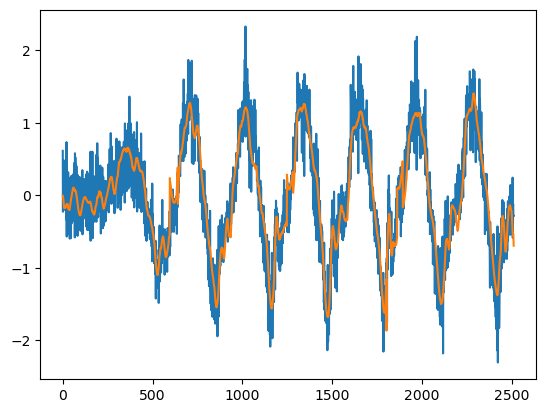

In [140]:
plt.plot(acc_pred[:,0])
plt.plot(y_pred[:,0])
plt.savefig('C:/Users/aruna/Downloads/MAML/baseline35sparsex_dual')
plt.show()

Baseline 70psin20t wind

In [171]:
modelE_70psp2 = RegressionE(12,36)
model_basis = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse4.pth")

modelE_70psp2.load_state_dict(chk['modelEsp_state_dict4'])
model_basis.load_state_dict(chk['model_basis_state_dict'])

<All keys matched successfully>

In [173]:
optimizerE_70psp2 = optim.Adam(modelE_70psp2.parameters(), lr=0.0015)
opti_70psp2_basis = optim.Adam(model_basis.parameters(), lr=0.0015)

In [192]:
num_epochs = 50

schedulerE_70psp2 = ReduceLROnPlateau(optimizerE_70psp2, mode='min', factor=0.75, patience=3)
scheduler_basis = ReduceLROnPlateau(opti_70psp2_basis, mode='min', factor=0.75, patience=3)

for epoch in range(num_epochs):
    loss = 0
    if epoch%2 == 0:
        optimizerE_70psp2.zero_grad() 
    else:
        opti_70psp2_basis.zero_grad()
    
    f1 = model_basis(v_70psin20[:,0])[:,0]
    f2 = model_basis(v_70psin20[:,1])[:,0]
    f3 = model_basis(v_70psin20[:,2])[:,0]
    f4 = model_basis(v_70psin20[:,0])[:,1]
    f5 = model_basis(v_70psin20[:,1])[:,1]
    f6 = model_basis(v_70psin20[:,2])[:,1]
    f7 = model_basis(Rfu_70psin20[:,0])[:,0]
    f8 = model_basis(Rfu_70psin20[:,1])[:,0]
    f9 = model_basis(Rfu_70psin20[:,2])[:,0]
    f10 = model_basis(Rfu_70psin20[:,0])[:,1]
    f11 = model_basis(Rfu_70psin20[:,1])[:,1]
    f12 = model_basis(Rfu_70psin20[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_70psp2(ip6)[:,0:12]
    E_y = modelE_70psp2(ip6)[:,12:24]
    E_z = modelE_70psp2(ip6)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
      
    loss = criterion(acc_70psin20,y) 
    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_70psp2.step() 
        
    else:
        opti_70psp2_basis.step()
        
    schedulerE_70psp2.step(loss)
    scheduler_basis.step(loss)
    
    loss /= len(v_no_wind)
    #loss_history_70psp2.append(loss)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")

Epoch [1/50], Loss: 0.000139
Epoch [2/50], Loss: 0.000139
Epoch [3/50], Loss: 0.000139
Epoch [4/50], Loss: 0.000138
Epoch [5/50], Loss: 0.000138
Epoch [6/50], Loss: 0.000138
Epoch [7/50], Loss: 0.000138
Epoch [8/50], Loss: 0.000138
Epoch [9/50], Loss: 0.000138
Epoch [10/50], Loss: 0.000138
Epoch [11/50], Loss: 0.000138
Epoch [12/50], Loss: 0.000137
Epoch [13/50], Loss: 0.000137
Epoch [14/50], Loss: 0.000137
Epoch [15/50], Loss: 0.000137
Epoch [16/50], Loss: 0.000137
Epoch [17/50], Loss: 0.000137
Epoch [18/50], Loss: 0.000137
Epoch [19/50], Loss: 0.000137
Epoch [20/50], Loss: 0.000136
Epoch [21/50], Loss: 0.000136
Epoch [22/50], Loss: 0.000136
Epoch [23/50], Loss: 0.000136
Epoch [24/50], Loss: 0.000136
Epoch [25/50], Loss: 0.000136
Epoch [26/50], Loss: 0.000135
Epoch [27/50], Loss: 0.000135
Epoch [28/50], Loss: 0.000135
Epoch [29/50], Loss: 0.000135
Epoch [30/50], Loss: 0.000135
Epoch [31/50], Loss: 0.000135
Epoch [32/50], Loss: 0.000135
Epoch [33/50], Loss: 0.000135
Epoch [34/50], Loss

In [193]:
f1 = model_basis(v_70psin20[:,0])[:,0]
f2 = model_basis(v_70psin20[:,1])[:,0]
f3 = model_basis(v_70psin20[:,2])[:,0]
f4 = model_basis(v_70psin20[:,0])[:,1]
f5 = model_basis(v_70psin20[:,1])[:,1]
f6 = model_basis(v_70psin20[:,2])[:,1]
f7 = model_basis(Rfu_70psin20[:,0])[:,0]
f8 = model_basis(Rfu_70psin20[:,1])[:,0]
f9 = model_basis(Rfu_70psin20[:,2])[:,0]
f10 = model_basis(Rfu_70psin20[:,0])[:,1]
f11 = model_basis(Rfu_70psin20[:,1])[:,1]
f12 = model_basis(Rfu_70psin20[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_70psp2(ip6)[:,0:12]
E_y = modelE_70psp2(ip6)[:,12:24]
E_z = modelE_70psp2(ip6)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))

print(feature.shape)
print(E.requires_grad)
y = torch.matmul(E, feature)    
y = y.squeeze(2)

torch.Size([2511, 12, 1])
True


In [194]:
y_pred = y.detach().numpy()
acc_pred = acc_70psin20.detach().numpy()

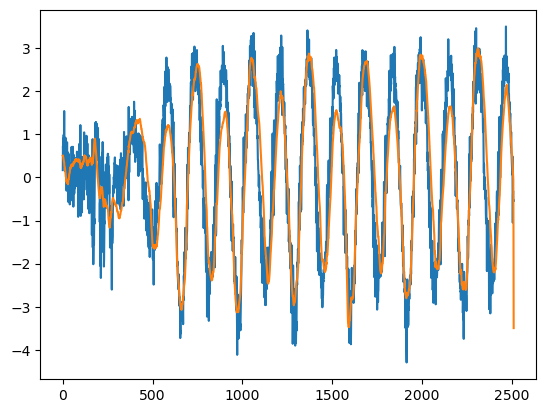

In [201]:
plt.plot(acc_pred[:,2])
plt.plot(y_pred[:,2])
#plt.legend()
plt.savefig('C:/Users/aruna/Downloads/MAML/70p20sintsparsez_dual')
plt.show()

Baseline 70 wind

In [162]:
modelE_b70s = RegressionE(12,36)
model_basis = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse4.pth")

modelE_b70s.load_state_dict(chk['modelEsp_state_dict4'])
model_basis.load_state_dict(chk['model_basis_state_dict'])

<All keys matched successfully>

In [164]:
optimizerE_b70s = optim.Adam(modelE_b70s.parameters(), lr=0.002)
optimizer_b70s_basis =  optim.Adam(model_basis.parameters(), lr=0.002)

schedulerE_b70s = ReduceLROnPlateau(optimizerE_b70s, mode='min', factor=0.75, patience=3)
scheduler_basis = ReduceLROnPlateau(optimizer_b70s_basis, mode='min', factor=0.75, patience=3)

In [178]:
num_epochs = 50

for epoch in range(num_epochs):
    loss = 0
    
    if epoch%2 == 0:
        optimizerE_b70s.zero_grad() 
    else:
        optimizer_b70s_basis.zero_grad()
    
    f1 = model_basis(v_b70[:,0])[:,0]
    f2 = model_basis(v_b70[:,1])[:,0]
    f3 = model_basis(v_b70[:,2])[:,0]
    f4 = model_basis(v_b70[:,0])[:,1]
    f5 = model_basis(v_b70[:,1])[:,1]
    f6 = model_basis(v_b70[:,2])[:,1]
    f7 = model_basis(Rfu_b70[:,0])[:,0]
    f8 = model_basis(Rfu_b70[:,1])[:,0]
    f9 = model_basis(Rfu_b70[:,2])[:,0]
    f10 = model_basis(Rfu_b70[:,0])[:,1]
    f11 = model_basis(Rfu_b70[:,1])[:,1]
    f12 = model_basis(Rfu_b70[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b70s(ip8)[:,0:12]
    E_y = modelE_b70s(ip8)[:,12:24]
    E_z = modelE_b70s(ip8)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b70,y)
    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b70s.step() 
        schedulerE_b70s.step(loss)
       
    else:
        optimizer_b70s_basis.step() 
        scheduler_basis.step(loss)  
        

    loss /= len(v_no_wind)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")

Epoch [1/50], Loss: 0.000103
Epoch [2/50], Loss: 0.000103
Epoch [3/50], Loss: 0.000103
Epoch [4/50], Loss: 0.000103
Epoch [5/50], Loss: 0.000103
Epoch [6/50], Loss: 0.000102
Epoch [7/50], Loss: 0.000102
Epoch [8/50], Loss: 0.000102
Epoch [9/50], Loss: 0.000102
Epoch [10/50], Loss: 0.000101
Epoch [11/50], Loss: 0.000101
Epoch [12/50], Loss: 0.000100
Epoch [13/50], Loss: 0.000100
Epoch [14/50], Loss: 0.000099
Epoch [15/50], Loss: 0.000099
Epoch [16/50], Loss: 0.000098
Epoch [17/50], Loss: 0.000098
Epoch [18/50], Loss: 0.000098
Epoch [19/50], Loss: 0.000098
Epoch [20/50], Loss: 0.000097
Epoch [21/50], Loss: 0.000097
Epoch [22/50], Loss: 0.000097
Epoch [23/50], Loss: 0.000097
Epoch [24/50], Loss: 0.000096
Epoch [25/50], Loss: 0.000096
Epoch [26/50], Loss: 0.000095
Epoch [27/50], Loss: 0.000095
Epoch [28/50], Loss: 0.000095
Epoch [29/50], Loss: 0.000095
Epoch [30/50], Loss: 0.000095
Epoch [31/50], Loss: 0.000095
Epoch [32/50], Loss: 0.000095
Epoch [33/50], Loss: 0.000095
Epoch [34/50], Loss

In [565]:
f1 = model_basis(v_b70[:,0])[:,0]
f2 = model_basis(v_b70[:,1])[:,0]
f3 = model_basis(v_b70[:,2])[:,0]
f4 = model_basis(v_b70[:,0])[:,1]
f5 = model_basis(v_b70[:,1])[:,1]
f6 = model_basis(v_b70[:,2])[:,1]
f7 = model_basis(Rfu_b70[:,0])[:,0]
f8 = model_basis(Rfu_b70[:,1])[:,0]
f9 = model_basis(Rfu_b70[:,2])[:,0]
f10 = model_basis(Rfu_b70[:,0])[:,1]
f11 = model_basis(Rfu_b70[:,1])[:,1]
f12 = model_basis(Rfu_b70[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_b70s(ip8)[:,0:12]
E_y = modelE_b70s(ip8)[:,12:24]
E_z = modelE_b70s(ip8)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
#print(modelE.state_dict())
y = torch.matmul(E, feature)    
y = y.squeeze(2)

In [568]:
y_pred = y.detach().numpy()
acc_pred = acc_b70.detach().numpy()

In [570]:
plt.plot(acc_pred[:,0])
plt.plot(y_pred[:,0])
#plt.legend()
#plt.savefig('C:/Users/aruna/Downloads/MAML/b70sparsez_dual')
plt.show()

In [250]:
modelE_b100s = RegressionE(12,36)
model_basis100 = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse4.pth")

modelE_b100s.load_state_dict(chk['modelEsp_state_dict4'])
model_basis100.load_state_dict(chk['model_basis_state_dict'])

<All keys matched successfully>

In [252]:
optimizerE_b100s = optim.Adam(modelE_b100s.parameters(), lr=0.0025)
optimizer_b100s_basis =  optim.Adam(model_basis100.parameters(), lr=0.0025)

schedulerE_b100s = ReduceLROnPlateau(optimizerE_b100s, mode='min', factor=0.75, patience=3)
scheduler_basis = ReduceLROnPlateau(optimizer_b100s_basis, mode='min', factor=0.75, patience=3)

In [272]:
num_epochs = 200

for epoch in range(num_epochs):
    loss = 0
    
    if epoch%2 == 0:
        optimizerE_b100s.zero_grad() 
    else:
        optimizer_b100s_basis.zero_grad()
    
    f1 = model_basis100(v_b100[:,0])[:,0]
    f2 = model_basis100(v_b100[:,1])[:,0]
    f3 = model_basis100(v_b100[:,2])[:,0]
    f4 = model_basis100(v_b100[:,0])[:,1]
    f5 = model_basis100(v_b100[:,1])[:,1]
    f6 = model_basis100(v_b100[:,2])[:,1]
    f7 = model_basis100(Rfu_b100[:,0])[:,0]
    f8 = model_basis100(Rfu_b100[:,1])[:,0]
    f9 = model_basis100(Rfu_b100[:,2])[:,0]
    f10 = model_basis100(Rfu_b100[:,0])[:,1]
    f11 = model_basis100(Rfu_b100[:,1])[:,1]
    f12 = model_basis100(Rfu_b100[:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b100s(ip10)[:,0:12]
    E_y = modelE_b100s(ip10)[:,12:24]
    E_z = modelE_b100s(ip10)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    loss = criterion(acc_b100,y)
    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b100s.step()    
    else:
        optimizer_b100s_basis.step() 
        
      
    schedulerE_b100s.step(loss)
    scheduler_basis.step(loss)

    loss /= len(v_no_wind)
   
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}")

In [307]:
f1 = model_basis100(v_b100[:,0])[:,0]
f2 = model_basis100(v_b100[:,1])[:,0]
f3 = model_basis100(v_b100[:,2])[:,0]
f4 = model_basis100(v_b100[:,0])[:,1]
f5 = model_basis100(v_b100[:,1])[:,1]
f6 = model_basis100(v_b100[:,2])[:,1]
f7 = model_basis100(Rfu_b100[:,0])[:,0]
f8 = model_basis100(Rfu_b100[:,1])[:,0]
f9 = model_basis100(Rfu_b100[:,2])[:,0]
f10 = model_basis100(Rfu_b100[:,0])[:,1]
f11 = model_basis100(Rfu_b100[:,1])[:,1]
f12 = model_basis100(Rfu_b100[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_b100s(ip10)[:,0:12]
E_y = modelE_b100s(ip10)[:,12:24]
E_z = modelE_b100s(ip10)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.25, E, torch.zeros_like(E))
#print(modelE.state_dict())
y = torch.matmul(E, feature)    
y = y.squeeze(2)

In [285]:
y_pred = y.detach().numpy()
acc_pred = acc_b100.detach().numpy()

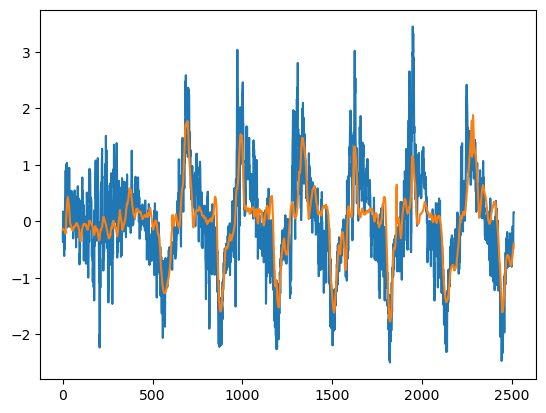

In [286]:
plt.plot(acc_pred[:,0])
plt.plot(y_pred[:,0])
#plt.legend()
#plt.savefig('C:/Users/aruna/Downloads/MAML/70p20sintsparsez_dual')
plt.show()

#### Comparison with SINDy

In [120]:
v_dup = v_70psin20[0:1500,:].detach().numpy()
Rfu_dup = Rfu_70psin20[0:1500,:].detach().numpy()
v_test = v_70psin20[1500:,:].detach().numpy()
Rfu_test = Rfu_70psin20[1500:,:].detach().numpy()
v_final = v_70psin20.detach().numpy()
Rfu_final = Rfu_70psin20.detach().numpy()
acc_actual = acc_70psin20.detach().numpy()

In [121]:
dt = 0.02
stlsq_optimizer = ps.STLSQ(threshold=.25, alpha=.2)

library_functions = [    
    lambda x : np.cos(x),
    lambda x : np.sin(x),    
]
library_function_names = [
    lambda x : '*np.cos(' + x + ')',
    lambda x : '*np.sin(' + x + ')'
]
custom_library = ps.CustomLibrary(
    library_functions=library_functions, function_names=library_function_names
)

modelSindy = ps.SINDy(feature_library=custom_library, optimizer=stlsq_optimizer)
modelSindy.fit(v_dup, u=Rfu_dup, t=dt)
modelSindy.print()

(x0)' = -50.803 *np.cos(x1) + 48.695 *np.cos(u0) + -0.587 *np.sin(x0) + 17.452 *np.sin(u0) + -14.939 *np.sin(u1) + 0.969 *np.sin(u2)
(x1)' = 2.058 *np.sin(u1)
(x2)' = 0.672 *np.cos(x0) + -11.594 *np.cos(x1) + 28.697 *np.cos(u0) + -26.747 *np.cos(u2) + -4.043 *np.sin(x1) + -0.519 *np.sin(x2) + -4.324 *np.sin(u0) + 15.247 *np.sin(u2)


In [122]:
acc_predict = modelSindy.predict(v_dup, u = Rfu_dup)
acc_test = modelSindy.predict(v_test, u = Rfu_test)
acc_final = modelSindy.predict(v_final, u = Rfu_final)

mse_training: 0.13848334806055349, mse_test: 0.10492229490689241, mse_final: 0.1249707137561523


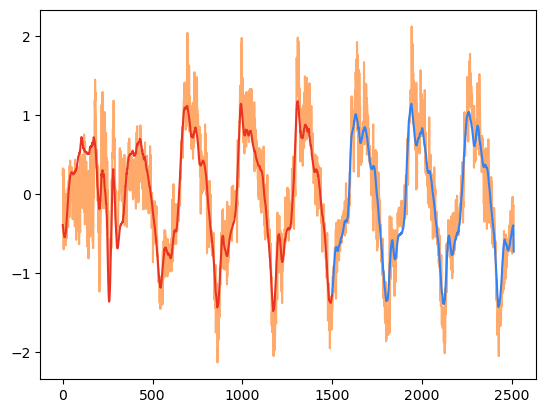

In [61]:
mse_test = mean_squared_error(acc_actual[1500:,:], acc_test[:,:])
mse_training = mean_squared_error(acc_actual[0:1500,:],acc_predict[:,:])
mse_final = mean_squared_error(acc_actual,acc_final)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_actual[:,0], color='#FFAA6B')
plt.plot(range(1500), acc_final[:1500, 0], color='#EB3324')
plt.plot(range(1500, len(acc_final)), acc_final[1500:, 0], color='#3282F6')
#plt.savefig('C:/Users/aruna/Downloads/MAML/SINDy_baseline70psin20x')

plt.show()

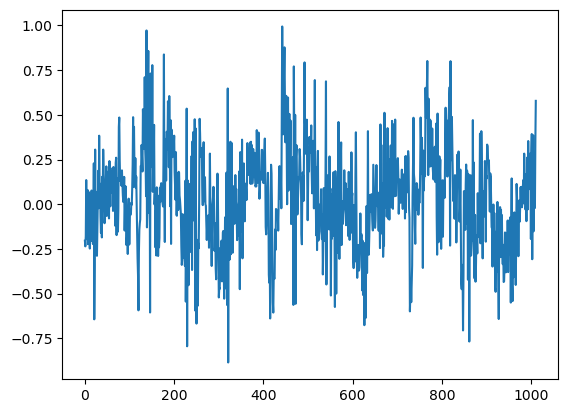

In [539]:
residuals = acc_actual[1500:,0]-acc_test[:,0]
plt.plot(residuals)

In [291]:
mse = mean_squared_error(acc_pred, acc)
mse

0.22803814729693697

In [292]:
mse = mean_squared_error(acc_pred, y_pred)
mse

0.29566637

### Rectifying the Residue Issue

In [132]:
class Discriminator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 12)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(12, 24)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(24,48)
        self.relu = nn.ReLU()
        self.fc4 = nn.Linear(48,18)
        self.relu = nn.ReLU()
        self.fc5 = nn.Linear(18, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x) 
        return x

In [133]:
Discriminator_net = Discriminator(3,3)
Discriminator_net.apply(init_weights)
model = Regression(1,2)

chk = torch.load("C:/Users/aruna/thesismaml2.pth")

model.load_state_dict(chk['model_state_dict'])
optimizer_basis = optim.AdamW(model.parameters(), lr = 0.001)

In [134]:
time = torch.linspace(0.0,50.2,2511)
time = time.unsqueeze(1)
time_mt = time[0:1681,:]
time_mu = time[1681:2511,:]
#mt = torch.cat((time_mt,mt),dim=1)

In [135]:
modelEsp3 = RegressionE(12,36)
modelEsp3.apply(init_weights)

criterion = nn.MSELoss()
optimizerE_musp3 = optim.AdamW(modelEsp3.parameters(), lr=0.001)
discriminator_optimizer = optim.AdamW(Discriminator_net.parameters(), lr=0.002)
huber_loss = torch.nn.HuberLoss(delta=1.0)

scheduler_outer = CosineAnnealingLR(optimizerE_musp3, T_max=100, eta_min=0.0001)
scheduler_outer_basis = CosineAnnealingLR(optimizer_basis, T_max=100, eta_min=0.0001)
scheduler_dis = CosineAnnealingLR(discriminator_optimizer, T_max=100, eta_min=0.0001)

In [136]:
num_tasks = 6
mt_batch_size = 1681
mu_batch_size = 830

for i in range(100):
    
    loss_mu = 0
    d_loss_mu = 0
    
    discriminator_optimizer.zero_grad()
    if i%2 == 0:
        optimizerE_musp3.zero_grad()
    else:
        optimizer_basis.zero_grad()

    for k in range(3):
        
        opti_d = optim.Adam(Discriminator_net.parameters(), lr=0.001)
        scheduler_d = ReduceLROnPlateau(opti_d, mode='min', factor=0.75, patience=3)
        
        optimizerEsp3 = optim.Adam(modelEsp3.parameters(), lr=0.0005)
        schedulerEsp3 = ReduceLROnPlateau(optimizerEsp3, mode='min', factor=0.75, patience=3)
        
        optib =  optim.Adam(model.parameters(), lr = 0.0005)
        schedulerb = ReduceLROnPlateau(optib, mode='min', factor=0.75, patience=3)
        
        for iterate in range(0, mt.shape[0], mt_batch_size):
            loss_mt = 0
            d_loss = 0
            
            opti_d.zero_grad()
            if i%2 == 0:
                optimizerEsp3.step() 
            else:
                optib.step()
                
            f1 = model(mt[iterate : iterate + mt_batch_size, 0])[:,0]
            f2 = model(mt[iterate : iterate + mt_batch_size, 1])[:,0]
            f3 = model(mt[iterate : iterate + mt_batch_size, 2])[:,0]
            f4 = model(mt[iterate : iterate + mt_batch_size, 0])[:,1]
            f5 = model(mt[iterate : iterate + mt_batch_size, 1])[:,1]
            f6 = model(mt[iterate : iterate + mt_batch_size, 2])[:,1]
            f7 = model(mt[iterate : iterate + mt_batch_size, 3])[:,0]
            f8 = model(mt[iterate : iterate + mt_batch_size, 4])[:,0]
            f9 = model(mt[iterate : iterate + mt_batch_size, 5])[:,0]
            f10 = model(mt[iterate : iterate + mt_batch_size, 3])[:,1]
            f11 = model(mt[iterate : iterate + mt_batch_size, 4])[:,1]
            f12 = model(mt[iterate : iterate + mt_batch_size, 5])[:,1]
            
            feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
            feature = feature.unsqueeze(2)

            E_x = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,0:12]
            E_y = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,12:24]
            E_z = modelEsp3(ip3[iterate : iterate + mt_batch_size, :])[:,24:36]

            E_x = E_x.unsqueeze(1)
            E_y = E_y.unsqueeze(1)
            E_z = E_z.unsqueeze(1)

            E = torch.cat((E_x, E_y, E_z), axis = 1)
    
            y = torch.matmul(E, feature) 
            y = y.squeeze(2)
            
            #residual = acc_mt[iterate : iterate + mt_batch_size, :]-y            
            extraction = Discriminator_net(y)
            extraction_temp = extraction.clone()
            extraction_temp = extraction_temp.detach()
            d_loss = huber_loss(acc_mt[iterate : iterate + mt_batch_size, :],extraction)
            d_loss.backward(retain_graph = True)
            
            opti_d.step()
            scheduler_d.step(d_loss)
            opti_d.zero_grad()
            
            if i%2 == 0:
                optimizerEsp3.zero_grad() 
            else:
                optib.zero_grad()
                        
            loss_x = huber_loss(acc_mt[iterate : iterate + mt_batch_size, 0],y[:,0])
            loss_y = huber_loss(acc_mt[iterate : iterate + mt_batch_size, 1],y[:,1])
            loss_z = huber_loss(acc_mt[iterate : iterate + mt_batch_size, 2],y[:,2])
            
            loss_mt = loss_x + loss_y + loss_z
            
            loss_mt = loss_mt + 0.2* d_loss.detach()
            loss_mt.backward(retain_graph = True)
            
            if i%2 == 0:
                optimizerEsp3.step() 
            else:
                optib.step()
                
            schedulerEsp3.step(loss_mt)
            schedulerb.step(loss_mt)
            
  
    for itr in range(0, mu.shape[0], mu_batch_size):
        
        f1 = model(mu[itr : itr + mu_batch_size, 0])[:,0]
        f2 = model(mu[itr : itr + mu_batch_size, 1])[:,0]
        f3 = model(mu[itr : itr + mu_batch_size, 2])[:,0]
        f4 = model(mu[itr : itr + mu_batch_size, 0])[:,1]
        f5 = model(mu[itr : itr + mu_batch_size, 1])[:,1]
        f6 = model(mu[itr : itr + mu_batch_size, 2])[:,1]
        f7 = model(mu[itr : itr + mu_batch_size, 3])[:,0]
        f8 = model(mu[itr : itr + mu_batch_size, 4])[:,0]
        f9 = model(mu[itr : itr + mu_batch_size, 5])[:,0]
        f10 = model(mu[itr : itr + mu_batch_size, 3])[:,1]
        f11 = model(mu[itr : itr + mu_batch_size, 4])[:,1]
        f12 = model(mu[itr : itr + mu_batch_size, 5])[:,1]
        feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
        feature = feature.unsqueeze(2)
        
        E_x = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,0:12]
        E_y = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,12:24]
        E_z = modelEsp3(ip4[itr : itr + mu_batch_size, :])[:,24:36]

        E_x = E_x.unsqueeze(1)
        E_y = E_y.unsqueeze(1)
        E_z = E_z.unsqueeze(1)
       
        E = torch.cat((E_x, E_y, E_z), axis = 1)
       
        y = torch.matmul(E, feature)    
        y = y.squeeze(2)
        
        #residual = acc_mu[itr : itr + mu_batch_size, :]-y            
        extraction = Discriminator_net(y)
        extraction_temp = extraction.clone()
        extraction_temp = extraction_temp.detach()
        d_loss = huber_loss(acc_mu[itr : itr + mu_batch_size, :],extraction)
        d_loss_mu += d_loss
        
        loss_mu_x = huber_loss(acc_mu[itr : itr + mu_batch_size, 0],y[:,0])
        loss_mu_y = huber_loss(acc_mu[itr : itr + mu_batch_size, 1],y[:,1])
        loss_mu_z = huber_loss(acc_mu[itr : itr + mu_batch_size, 2],y[:,2])

        loss_mu_t = loss_mu_x + loss_mu_y + loss_mu_z
        loss_mu = loss_mu + loss_mu_t
    
    d_loss_mu.backward(retain_graph = True)
    discriminator_optimizer.step()
    scheduler_dis.step()
    discriminator_optimizer.zero_grad()

    if i%2 == 0:
        optimizerE_musp3.zero_grad()
    else:
        optimizer_basis.zero_grad()
        
    loss_mu = loss_mu + 0.2* d_loss_mu.detach()
    loss_mu.backward(retain_graph = True)
    
    if i%2 == 0:
        optimizerE_musp3.step()
        scheduler_outer.step()
    else:
        optimizer_basis.step()
        scheduler_outer_basis.step()
        
    loss_mu /= mu.shape[0]
    
    print(f"{i} : loss_mu : {loss_mu}")

0 : loss_mu : 0.002682742429897189
1 : loss_mu : 0.0026552274357527494
2 : loss_mu : 0.0025224622804671526
3 : loss_mu : 0.0024725960101932287
4 : loss_mu : 0.002288313815370202
5 : loss_mu : 0.0022329376079142094
6 : loss_mu : 0.0019943297374993563
7 : loss_mu : 0.0019307041075080633
8 : loss_mu : 0.0017061436083167791
9 : loss_mu : 0.0016617302317172289
10 : loss_mu : 0.001496554585173726
11 : loss_mu : 0.0014602351002395153
12 : loss_mu : 0.0013487457763403654
13 : loss_mu : 0.0013118224451318383
14 : loss_mu : 0.0012324333656579256
15 : loss_mu : 0.0011912446934729815
16 : loss_mu : 0.001130916876718402
17 : loss_mu : 0.0010897463653236628
18 : loss_mu : 0.0010425167856737971
19 : loss_mu : 0.001001829281449318
20 : loss_mu : 0.0009642880759201944
21 : loss_mu : 0.0009256864432245493
22 : loss_mu : 0.0008979630074463785
23 : loss_mu : 0.0008667418151162565
24 : loss_mu : 0.000850154145155102
25 : loss_mu : 0.0008266353397630155
26 : loss_mu : 0.0008230378152802587
27 : loss_mu : 0.

In [127]:
print(E.shape)
print(y.shape)
print(ip3.shape)
# Define the coefficient matrix A and the target values B
A = torch.tensor([[2.0, 1.0], [1.0, -1.0], [3.0, 2.0]])
B = torch.tensor([[8.0], [1.0], [11.0]])

# Use torch.lstsq to solve the least squares problem
X = torch.linalg.lstsq(acc_mu[itr : itr + mu_batch_size, :], ip4[itr : itr + mu_batch_size, :])
print(X.solution.shape)

torch.Size([1681, 3, 12])
torch.Size([1681, 3])
torch.Size([10086, 12])
torch.Size([3, 12])


In [137]:
checkpoint_maml_sparse5 = {
    'modelEsp_state_dict5': modelEsp3.state_dict(),

    'optimizerEsp_state_dict5': optimizerEsp3.state_dict(),
    'optimizerE_musp_state_dict5 ': optimizerE_musp3.state_dict(),
    
    'model_basis_state_dict' : model.state_dict(),
    'optimizer_basis_state_dict' : optimizer_basis.state_dict(),
    
    'Discriminator_dict' : Discriminator_net.state_dict(),
    'optimizer_discriminator' : discriminator_optimizer.state_dict(),
}
checkpoint_path_sparse5 = "C:/Users/aruna/thesis_maml_sparse5.pth"  # Update with the desired save path
torch.save(checkpoint_maml_sparse5, checkpoint_path_sparse5)

Baseline 70psin20t wind

In [197]:
modelE_70psp3 = RegressionE(12,36)
model_basis = Regression(1,2)
model_dis = Discriminator(3,3)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse5.pth")

modelE_70psp3.load_state_dict(chk['modelEsp_state_dict5'])
model_basis.load_state_dict(chk['model_basis_state_dict'])
model_dis.load_state_dict(chk['Discriminator_dict'])

<All keys matched successfully>

In [198]:
optimizerE_70psp3 = optim.AdamW(modelE_70psp3.parameters(), lr=0.001)
opti_70psp3_basis = optim.AdamW(model_basis.parameters(), lr=0.001)
opti_d = optim.AdamW(model_dis.parameters(), lr=0.002)

In [199]:
v_70psin20_val = v_70psin20[1500:2000,:]
Rfu_70psin20_val = Rfu_70psin20[1500:2000,:]
ip_val = torch.cat((v_70psin20_val,Rfu_70psin20_val),dim = 1)
v_no_wind_val = v_no_wind[1500:2000,:]
Rfu_no_wind_val = Rfu_no_wind[1500:2000,:]
no_wind_val = torch.cat((v_no_wind_val, Rfu_no_wind_val),dim = 1)
ip_val = torch.cat((no_wind_val,ip_val),dim = 1)
print(ip_val.shape)
acc_val = acc_70psin20[1500:2000,:]

torch.Size([500, 12])


In [200]:
num_epochs = 500

schedulerE_70psp3 = CosineAnnealingLR(optimizerE_70psp3, T_max=300, eta_min=0.0001)
scheduler_basis = CosineAnnealingLR(opti_70psp3_basis, T_max=300, eta_min=0.0001)
scheduler_d = CosineAnnealingLR(opti_d, T_max=300, eta_min=0.0001)

for epoch in range(num_epochs):
    loss = 0
    acc_f_loss = 0
    
    opti_d.zero_grad()
    
    if epoch%2 == 0:
        optimizerE_70psp3.zero_grad() 
    else:
        opti_70psp3_basis.zero_grad()
        
    f1 = model_basis(v_70psin20[0:1500,0])[:,0]
    f2 = model_basis(v_70psin20[0:1500,1])[:,0]
    f3 = model_basis(v_70psin20[0:1500,2])[:,0]
    f4 = model_basis(v_70psin20[0:1500,0])[:,1]
    f5 = model_basis(v_70psin20[0:1500,1])[:,1]
    f6 = model_basis(v_70psin20[0:1500,2])[:,1]
    f7 = model_basis(Rfu_70psin20[0:1500,0])[:,0]
    f8 = model_basis(Rfu_70psin20[0:1500,1])[:,0]
    f9 = model_basis(Rfu_70psin20[0:1500,2])[:,0]
    f10 = model_basis(Rfu_70psin20[0:1500,0])[:,1]
    f11 = model_basis(Rfu_70psin20[0:1500,1])[:,1]
    f12 = model_basis(Rfu_70psin20[0:1500,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
   
    feature = feature.unsqueeze(2)
    
    E_x = modelE_70psp3(ip6[0:1500,:])[:,0:12]
    E_y = modelE_70psp3(ip6[0:1500,:])[:,12:24]
    E_z = modelE_70psp3(ip6[0:1500,:])[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    #print(modelE.state_dict())
    y = torch.matmul(E, feature)    
    y = y.squeeze(2) 
    
    #residual = acc_70psin20[0:1500,:]-y
    extraction = model_dis(random_noise[0:1500,:])
    
    loss_x = huber_loss(acc_70psin20[0:1500,0], y[:,0])
    loss_y = huber_loss(acc_70psin20[0:1500,1], y[:,1])
    loss_z = huber_loss(acc_70psin20[0:1500,2], y[:,2])
    
    loss = loss_x + loss_y + loss_z
    loss.backward(retain_graph = True)
    
    acc_f = y + extraction
    acc_f_loss = huber_loss(acc_70psin20[0:1500,:],acc_f[:,:]) 
    acc_f_loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_70psp3.step() 
        schedulerE_70psp3.step()
    else:
        opti_70psp3_basis.step()
        scheduler_basis.step()
        
    opti_d.step()
    scheduler_d.step()
       
    #loss_history_70psp2.append(loss)
    acc_f_loss /= 1500
    loss /= 1500
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}, acc_f_loss: {acc_f_loss: .6f}")

Epoch [1/500], Loss: 0.002059, acc_f_loss:  0.000860
Epoch [2/500], Loss: 0.001820, acc_f_loss:  0.000732
Epoch [3/500], Loss: 0.001666, acc_f_loss:  0.000653
Epoch [4/500], Loss: 0.001480, acc_f_loss:  0.000572
Epoch [5/500], Loss: 0.001395, acc_f_loss:  0.000540
Epoch [6/500], Loss: 0.001246, acc_f_loss:  0.000485
Epoch [7/500], Loss: 0.001185, acc_f_loss:  0.000464
Epoch [8/500], Loss: 0.001055, acc_f_loss:  0.000420
Epoch [9/500], Loss: 0.001001, acc_f_loss:  0.000398
Epoch [10/500], Loss: 0.000885, acc_f_loss:  0.000361
Epoch [11/500], Loss: 0.000844, acc_f_loss:  0.000338
Epoch [12/500], Loss: 0.000741, acc_f_loss:  0.000311
Epoch [13/500], Loss: 0.000717, acc_f_loss:  0.000293
Epoch [14/500], Loss: 0.000632, acc_f_loss:  0.000276
Epoch [15/500], Loss: 0.000621, acc_f_loss:  0.000264
Epoch [16/500], Loss: 0.000557, acc_f_loss:  0.000257
Epoch [17/500], Loss: 0.000553, acc_f_loss:  0.000249
Epoch [18/500], Loss: 0.000510, acc_f_loss:  0.000248
Epoch [19/500], Loss: 0.000509, acc_f

Epoch [152/500], Loss: 0.000159, acc_f_loss:  0.000053
Epoch [153/500], Loss: 0.000159, acc_f_loss:  0.000053
Epoch [154/500], Loss: 0.000158, acc_f_loss:  0.000053
Epoch [155/500], Loss: 0.000158, acc_f_loss:  0.000053
Epoch [156/500], Loss: 0.000158, acc_f_loss:  0.000053
Epoch [157/500], Loss: 0.000158, acc_f_loss:  0.000053
Epoch [158/500], Loss: 0.000157, acc_f_loss:  0.000053
Epoch [159/500], Loss: 0.000157, acc_f_loss:  0.000053
Epoch [160/500], Loss: 0.000157, acc_f_loss:  0.000052
Epoch [161/500], Loss: 0.000157, acc_f_loss:  0.000052
Epoch [162/500], Loss: 0.000156, acc_f_loss:  0.000052
Epoch [163/500], Loss: 0.000156, acc_f_loss:  0.000052
Epoch [164/500], Loss: 0.000156, acc_f_loss:  0.000052
Epoch [165/500], Loss: 0.000156, acc_f_loss:  0.000052
Epoch [166/500], Loss: 0.000155, acc_f_loss:  0.000052
Epoch [167/500], Loss: 0.000155, acc_f_loss:  0.000052
Epoch [168/500], Loss: 0.000155, acc_f_loss:  0.000052
Epoch [169/500], Loss: 0.000155, acc_f_loss:  0.000052
Epoch [170

Epoch [301/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [302/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [303/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [304/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [305/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [306/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [307/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [308/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [309/500], Loss: 0.000137, acc_f_loss:  0.000046
Epoch [310/500], Loss: 0.000137, acc_f_loss:  0.000045
Epoch [311/500], Loss: 0.000137, acc_f_loss:  0.000045
Epoch [312/500], Loss: 0.000137, acc_f_loss:  0.000045
Epoch [313/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [314/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [315/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [316/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [317/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [318/500], Loss: 0.000136, acc_f_loss:  0.000045
Epoch [319

Epoch [450/500], Loss: 0.000132, acc_f_loss:  0.000044
Epoch [451/500], Loss: 0.000132, acc_f_loss:  0.000044
Epoch [452/500], Loss: 0.000132, acc_f_loss:  0.000044
Epoch [453/500], Loss: 0.000132, acc_f_loss:  0.000044
Epoch [454/500], Loss: 0.000132, acc_f_loss:  0.000043
Epoch [455/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [456/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [457/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [458/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [459/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [460/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [461/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [462/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [463/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [464/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [465/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [466/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [467/500], Loss: 0.000131, acc_f_loss:  0.000043
Epoch [468

In [201]:
f1 = model_basis(v_70psin20[:,0])[:,0]
f2 = model_basis(v_70psin20[:,1])[:,0]
f3 = model_basis(v_70psin20[:,2])[:,0]
f4 = model_basis(v_70psin20[:,0])[:,1]
f5 = model_basis(v_70psin20[:,1])[:,1]
f6 = model_basis(v_70psin20[:,2])[:,1]
f7 = model_basis(Rfu_70psin20[:,0])[:,0]
f8 = model_basis(Rfu_70psin20[:,1])[:,0]
f9 = model_basis(Rfu_70psin20[:,2])[:,0]
f10 = model_basis(Rfu_70psin20[:,0])[:,1]
f11 = model_basis(Rfu_70psin20[:,1])[:,1]
f12 = model_basis(Rfu_70psin20[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)

feature = feature.unsqueeze(2)

E_x = modelE_70psp3(ip6)[:,0:12]
E_y = modelE_70psp3(ip6)[:,12:24]
E_z = modelE_70psp3(ip6)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
#print(modelE.state_dict())
y_pred = torch.matmul(E, feature)    
y_pred = y_pred.squeeze(2)
extraction = model_dis(random_noise[:,:])
y_pred = y_pred + extraction

In [202]:
y_pred = y_pred.detach().numpy()
acc_pred = acc_70psin20.detach().numpy()

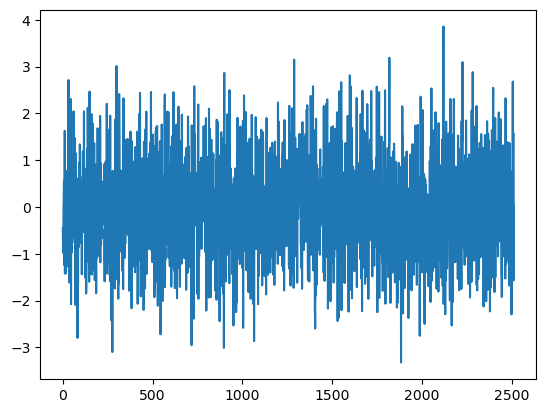

In [203]:
data_shape = (2511,3)
random_noise = torch.randn(data_shape)
plt.plot(random_noise.detach()[:,2])

mse_training: 0.13103103637695312, mse_test: 0.13513024151325226, mse_final: 0.1326814740896225


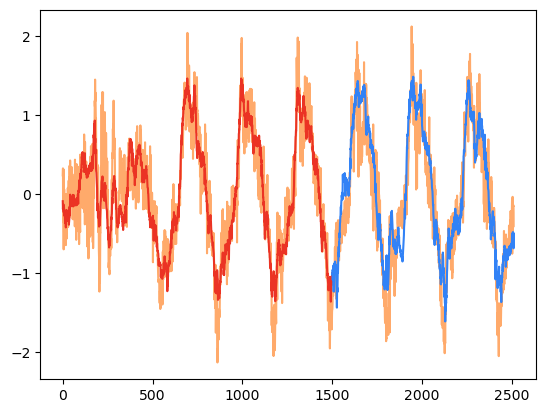

In [205]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:,0], color='#FFAA6B')
plt.plot(range(1500), y_pred[:1500, 0], color='#EB3324')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 0], color='#3282F6')
#plt.savefig('C:/Users/aruna/Downloads/MAML/MAML-D_baseline70psin20z')

plt.show()

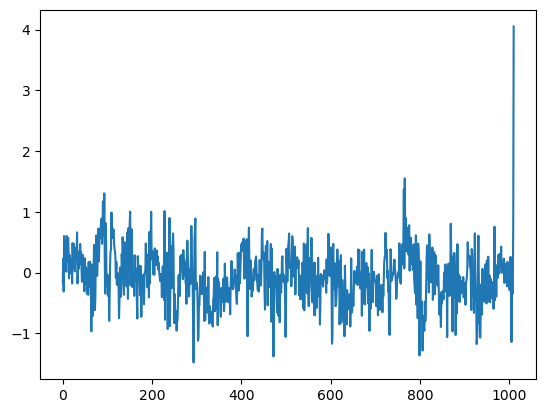

In [208]:
plt.plot(acc_pred[1500:,2]-y_pred[1500:,2])
#plt.plot(dyn_pred[:,0])
#plt.legend()
#plt.savefig('C:/Users/aruna/Downloads/MAML/70p20sintsparsey_dual_ortho')
#plt.show()

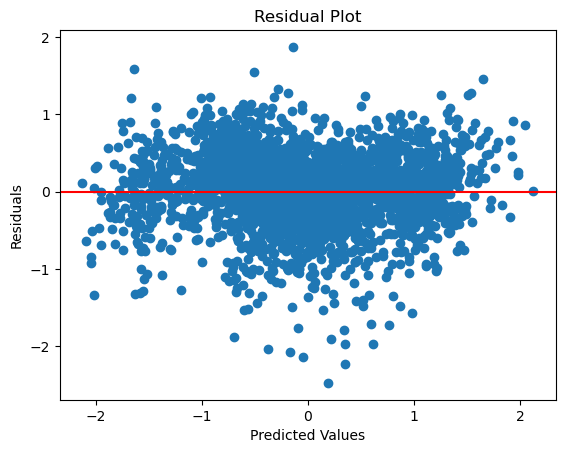

In [425]:
residuals = acc_pred[:,2]-y_pred[:,2]

# Plot the residuals against the predicted values
plt.scatter(acc_pred[:,0], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Baseline 100 wind 

In [437]:
modelE_b100s = RegressionE(12,36)
model_basis100 = Regression(1,2)
model_dis_100 = Discriminator(3,3)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse5.pth")

modelE_b100s.load_state_dict(chk['modelEsp_state_dict5'])
model_basis100.load_state_dict(chk['model_basis_state_dict'])
model_dis_100.load_state_dict(chk['Discriminator_dict'])

<All keys matched successfully>

In [438]:
optimizerE_b100s = optim.AdamW(modelE_b100s.parameters(), lr=0.001)
optimizer_b100s_basis =  optim.AdamW(model_basis100.parameters(), lr=0.001)

schedulerE_b100s = CosineAnnealingLR(optimizerE_b100s, T_max=400, eta_min=0.0001)
scheduler_basis = CosineAnnealingLR(optimizer_b100s_basis, T_max=400, eta_min=0.0001)

optimizer_dis_100 = optim.AdamW(model_dis_100.parameters(), lr = 0.002)
scheduler_dis_100 = CosineAnnealingLR(optimizer_dis_100, T_max = 400, eta_min = 0.0001)

In [447]:
num_epochs = 100

for epoch in range(num_epochs):
    loss = 0
    d_loss = 0
    
    if epoch%2 == 0:
        optimizerE_b100s.zero_grad() 
    else:
        optimizer_b100s_basis.zero_grad()    
    optimizer_dis_100.zero_grad()
    
    f1 = model_basis100(v_b100[0:1500:,0])[:,0]
    f2 = model_basis100(v_b100[0:1500:,1])[:,0]
    f3 = model_basis100(v_b100[0:1500:,2])[:,0]
    f4 = model_basis100(v_b100[0:1500:,0])[:,1]
    f5 = model_basis100(v_b100[0:1500:,1])[:,1]
    f6 = model_basis100(v_b100[0:1500:,2])[:,1]
    f7 = model_basis100(Rfu_b100[0:1500:,0])[:,0]
    f8 = model_basis100(Rfu_b100[0:1500:,1])[:,0]
    f9 = model_basis100(Rfu_b100[0:1500:,2])[:,0]
    f10 = model_basis100(Rfu_b100[0:1500:,0])[:,1]
    f11 = model_basis100(Rfu_b100[0:1500:,1])[:,1]
    f12 = model_basis100(Rfu_b100[0:1500:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b100s(ip10b)[:,0:12]
    E_y = modelE_b100s(ip10b)[:,12:24]
    E_z = modelE_b100s(ip10b)[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    residual = acc_b100[0:1500,:]-y
    extraction = model_dis_100(residual)
    d_loss = huber_loss(acc_b100[0:1500,:],extraction)
    d_loss.backward(retain_graph = True)
    
    optimizer_dis_100.step()
    scheduler_dis_100.step()
    
    if epoch%2 == 0:
        optimizerE_b100s.zero_grad() 
    else:
        optimizer_b100s_basis.zero_grad()    
    optimizer_dis_100.zero_grad()
    
    loss_x = huber_loss(acc_b100[0:1500,0], y[:,0])
    loss_y = huber_loss(acc_b100[0:1500,1], y[:,1])
    loss_z = huber_loss(acc_b100[0:1500,2], y[:,2])
    
    loss = loss_x + loss_y + loss_z -0.35*d_loss.detach()

    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b100s.step() 
        schedulerE_b100s.step()
    else:
        optimizer_b100s_basis.step() 
        scheduler_basis.step()
        
    d_loss /= 1500
    loss /= 1500
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}, d_loss: {d_loss: .6f}")

Epoch [1/100], Loss: 0.000197, d_loss:  0.000209
Epoch [2/100], Loss: 0.000197, d_loss:  0.000210
Epoch [3/100], Loss: 0.000197, d_loss:  0.000210
Epoch [4/100], Loss: 0.000196, d_loss:  0.000210
Epoch [5/100], Loss: 0.000196, d_loss:  0.000210
Epoch [6/100], Loss: 0.000196, d_loss:  0.000210
Epoch [7/100], Loss: 0.000196, d_loss:  0.000210
Epoch [8/100], Loss: 0.000195, d_loss:  0.000210
Epoch [9/100], Loss: 0.000195, d_loss:  0.000210
Epoch [10/100], Loss: 0.000195, d_loss:  0.000211
Epoch [11/100], Loss: 0.000195, d_loss:  0.000210
Epoch [12/100], Loss: 0.000194, d_loss:  0.000211
Epoch [13/100], Loss: 0.000194, d_loss:  0.000211
Epoch [14/100], Loss: 0.000194, d_loss:  0.000211
Epoch [15/100], Loss: 0.000194, d_loss:  0.000211
Epoch [16/100], Loss: 0.000193, d_loss:  0.000211
Epoch [17/100], Loss: 0.000193, d_loss:  0.000211
Epoch [18/100], Loss: 0.000193, d_loss:  0.000211
Epoch [19/100], Loss: 0.000193, d_loss:  0.000211
Epoch [20/100], Loss: 0.000192, d_loss:  0.000211
Epoch [21

In [448]:
f1 = model_basis100(v_b100[:,0])[:,0]
f2 = model_basis100(v_b100[:,1])[:,0]
f3 = model_basis100(v_b100[:,2])[:,0]
f4 = model_basis100(v_b100[:,0])[:,1]
f5 = model_basis100(v_b100[:,1])[:,1]
f6 = model_basis100(v_b100[:,2])[:,1]
f7 = model_basis100(Rfu_b100[:,0])[:,0]
f8 = model_basis100(Rfu_b100[:,1])[:,0]
f9 = model_basis100(Rfu_b100[:,2])[:,0]
f10 = model_basis100(Rfu_b100[:,0])[:,1]
f11 = model_basis100(Rfu_b100[:,1])[:,1]
f12 = model_basis100(Rfu_b100[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_b100s(ip10)[:,0:12]
E_y = modelE_b100s(ip10)[:,12:24]
E_z = modelE_b100s(ip10)[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
#print(modelE.state_dict())
y = torch.matmul(E, feature)    
y = y.squeeze(2)

In [449]:
y_pred = y.detach().numpy()
acc_pred = acc_b100.detach().numpy()

mse_training: 0.26803717017173767, mse_test: 0.3024068772792816, mse_final: 0.2818756103515625


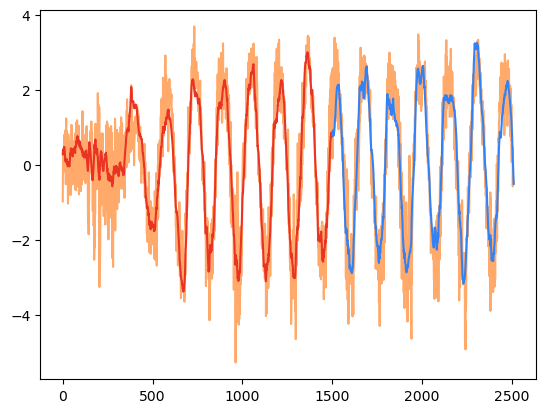

In [454]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:,2], color='#FFAA6B')
plt.plot(range(1500), y_pred[:1500, 2], color='#EB3324')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 2], color='#3282F6')
plt.savefig('C:/Users/aruna/Downloads/MAML/MAML-D_baseline100z')

plt.show()

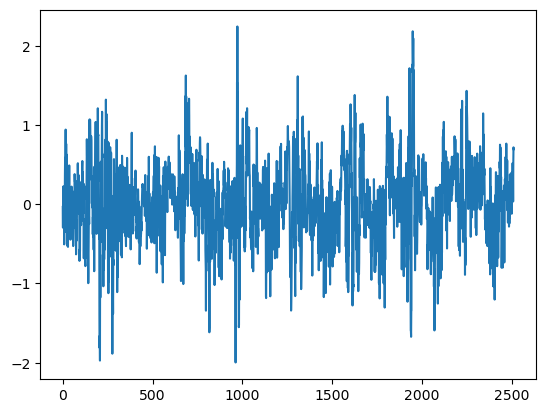

In [456]:
plt.plot(acc_pred[:,0]-y_pred[:,0])

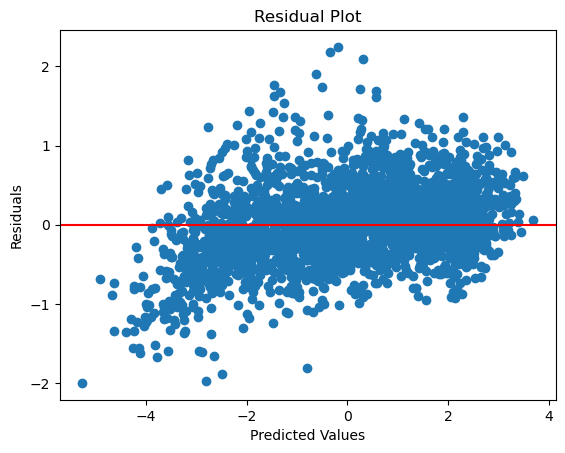

In [458]:
residuals = acc_pred[:,0]-y_pred[:,0]

# Plot the residuals against the predicted values
plt.scatter(acc_pred[:,2], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Baseline 70 wind

In [459]:
modelE_b70s = RegressionE(12,36)
model_basis70 = Regression(1,2)
model_dis_70 = Discriminator(3,3)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse5.pth")

modelE_b70s.load_state_dict(chk['modelEsp_state_dict5'])
model_basis70.load_state_dict(chk['model_basis_state_dict'])
model_dis_70.load_state_dict(chk['Discriminator_dict'])

<All keys matched successfully>

In [460]:
optimizerE_b70s = optim.AdamW(modelE_b70s.parameters(), lr=0.001)
optimizer_b70s_basis =  optim.AdamW(model_basis70.parameters(), lr=0.001)

schedulerE_b70s = CosineAnnealingLR(optimizerE_b70s, T_max=400, eta_min=0.0001)
scheduler_basis = CosineAnnealingLR(optimizer_b70s_basis, T_max=400, eta_min=0.0001)

optimizer_dis_70 = optim.AdamW(model_dis_70.parameters(), lr = 0.002)
scheduler_dis_70 = CosineAnnealingLR(optimizer_dis_70, T_max = 400, eta_min = 0.0001)

In [462]:
num_epochs = 400

for epoch in range(num_epochs):
    loss = 0
    d_loss = 0
    
    if epoch%2 == 0:
        optimizerE_b70s.zero_grad() 
    else:
        optimizer_b70s_basis.zero_grad()    
    optimizer_dis_70.zero_grad()
    
    f1 = model_basis70(v_b70[0:1500:,0])[:,0]
    f2 = model_basis70(v_b70[0:1500:,1])[:,0]
    f3 = model_basis70(v_b70[0:1500:,2])[:,0]
    f4 = model_basis70(v_b70[0:1500:,0])[:,1]
    f5 = model_basis70(v_b70[0:1500:,1])[:,1]
    f6 = model_basis70(v_b70[0:1500:,2])[:,1]
    f7 = model_basis70(Rfu_b70[0:1500:,0])[:,0]
    f8 = model_basis70(Rfu_b70[0:1500:,1])[:,0]
    f9 = model_basis70(Rfu_b70[0:1500:,2])[:,0]
    f10 = model_basis70(Rfu_b70[0:1500:,0])[:,1]
    f11 = model_basis70(Rfu_b70[0:1500:,1])[:,1]
    f12 = model_basis70(Rfu_b70[0:1500:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b70s(ip8[0:1500,:])[:,0:12]
    E_y = modelE_b70s(ip8[0:1500,:])[:,12:24]
    E_z = modelE_b70s(ip8[0:1500,:])[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    residual = acc_b70[0:1500,:]-y
    extraction = model_dis_70(residual)
    d_loss = huber_loss(acc_b70[0:1500,:],extraction)
    d_loss.backward(retain_graph = True)
    
    optimizer_dis_70.step()
    scheduler_dis_70.step()
    
    if epoch%2 == 0:
        optimizerE_b70s.zero_grad() 
    else:
        optimizer_b70s_basis.zero_grad()    
    optimizer_dis_70.zero_grad()
    
    loss_x = huber_loss(acc_b70[0:1500,0], y[:,0])
    loss_y = huber_loss(acc_b70[0:1500,1], y[:,1])
    loss_z = huber_loss(acc_b70[0:1500,2], y[:,2])
    
    loss = loss_x + loss_y + loss_z -0.35*d_loss.detach()

    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b70s.step() 
        schedulerE_b70s.step()
    else:
        optimizer_b70s_basis.step() 
        scheduler_basis.step()
        
    d_loss /= 1500
    loss /= 1500
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}, d_loss: {d_loss: .6f}")

In [477]:
f1 = model_basis70(v_b70[:,0])[:,0]
f2 = model_basis70(v_b70[:,1])[:,0]
f3 = model_basis70(v_b70[:,2])[:,0]
f4 = model_basis70(v_b70[:,0])[:,1]
f5 = model_basis70(v_b70[:,1])[:,1]
f6 = model_basis70(v_b70[:,2])[:,1]
f7 = model_basis70(Rfu_b70[:,0])[:,0]
f8 = model_basis70(Rfu_b70[:,1])[:,0]
f9 = model_basis70(Rfu_b70[:,2])[:,0]
f10 = model_basis70(Rfu_b70[:,0])[:,1]
f11 = model_basis70(Rfu_b70[:,1])[:,1]
f12 = model_basis70(Rfu_b70[:,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_b70s(ip8[:,:])[:,0:12]
E_y = modelE_b70s(ip8[:,:])[:,12:24]
E_z = modelE_b70s(ip8[:,:])[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
y = torch.matmul(E, feature)    
y = y.squeeze(2)

In [478]:
y_pred = y.detach().numpy()
acc_pred = acc_b70.detach().numpy()

mse_training: 0.20995308458805084, mse_test: 0.21861553192138672, mse_final: 0.21344083547592163


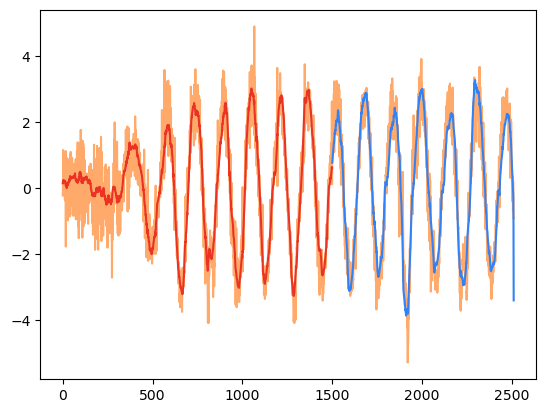

In [482]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:,2], color='#FFAA6B')
plt.plot(range(1500), y_pred[:1500, 2], color='#EB3324')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 2], color='#3282F6')
plt.savefig('C:/Users/aruna/Downloads/MAML/MAML-D_baseline70z')

plt.show()

Baseline 35 wind

In [518]:
modelE_b35s = RegressionE(12,36)
model_basis35 = Regression(1,2)
model_dis_35 = Discriminator(3,3)

chk = torch.load("C:/Users/aruna/thesis_maml_sparse5.pth")

modelE_b35s.load_state_dict(chk['modelEsp_state_dict5'])
model_basis35.load_state_dict(chk['model_basis_state_dict'])
model_dis_35.load_state_dict(chk['Discriminator_dict'])

<All keys matched successfully>

In [519]:
optimizerE_b35s = optim.AdamW(modelE_b35s.parameters(), lr=0.001)
optimizer_b35s_basis =  optim.AdamW(model_basis35.parameters(), lr=0.001)

schedulerE_b35s = CosineAnnealingLR(optimizerE_b35s, T_max=200, eta_min=0.0001)
scheduler_basis = CosineAnnealingLR(optimizer_b35s_basis, T_max=200, eta_min=0.0001)

optimizer_dis_35 = optim.AdamW(model_dis_35.parameters(), lr = 0.002)
scheduler_dis_35 = CosineAnnealingLR(optimizer_dis_35, T_max = 200, eta_min = 0.0001)

In [520]:
num_epochs = 200

for epoch in range(num_epochs):
    loss = 0
    d_loss = 0
    
    if epoch%2 == 0:
        optimizerE_b35s.zero_grad() 
    else:
        optimizer_b35s_basis.zero_grad()    
    optimizer_dis_35.zero_grad()
    
    f1 = model_basis35(v_b35[0:1500:,0])[:,0]
    f2 = model_basis35(v_b35[0:1500:,1])[:,0]
    f3 = model_basis35(v_b35[0:1500:,2])[:,0]
    f4 = model_basis35(v_b35[0:1500:,0])[:,1]
    f5 = model_basis35(v_b35[0:1500:,1])[:,1]
    f6 = model_basis35(v_b35[0:1500:,2])[:,1]
    f7 = model_basis35(Rfu_b35[0:1500:,0])[:,0]
    f8 = model_basis35(Rfu_b35[0:1500:,1])[:,0]
    f9 = model_basis35(Rfu_b35[0:1500:,2])[:,0]
    f10 = model_basis35(Rfu_b35[0:1500:,0])[:,1]
    f11 = model_basis35(Rfu_b35[0:1500:,1])[:,1]
    f12 = model_basis35(Rfu_b35[0:1500:,2])[:,1]
    feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
    feature = feature.unsqueeze(2)
    
    E_x = modelE_b35s(ip5[0:1500,:])[:,0:12]
    E_y = modelE_b35s(ip5[0:1500,:])[:,12:24]
    E_z = modelE_b35s(ip5[0:1500,:])[:,24:36]

    E_x = E_x.unsqueeze(1)
    E_y = E_y.unsqueeze(1)
    E_z = E_z.unsqueeze(1)

    E = torch.cat((E_x, E_y, E_z), axis = 1)
    E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
    y = torch.matmul(E, feature)    
    y = y.squeeze(2)
    
    residual = acc_b35[0:1500,:]-y
    extraction = model_dis_35(residual)
    d_loss = huber_loss(acc_b35[0:1500,:],extraction)
    d_loss.backward(retain_graph = True)
    
    optimizer_dis_35.step()
    scheduler_dis_35.step()
    
    if epoch%2 == 0:
        optimizerE_b35s.zero_grad() 
    else:
        optimizer_b35s_basis.zero_grad()    
    optimizer_dis_35.zero_grad()
    
    loss_x = huber_loss(acc_b35[0:1500,0], y[:,0])
    loss_y = huber_loss(acc_b35[0:1500,1], y[:,1])
    loss_z = huber_loss(acc_b35[0:1500,2], y[:,2])
    
    loss = loss_x + loss_y + loss_z -0.25*d_loss.detach()

    loss.backward(retain_graph = True)
    
    if epoch%2 == 0:
        optimizerE_b35s.step() 
        schedulerE_b35s.step()
    else:
        optimizer_b35s_basis.step() 
        scheduler_basis.step()
        
    d_loss /= 1500
    loss /= 1500
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.6f}, d_loss: {d_loss: .6f}")

Epoch [1/200], Loss: 0.000292, d_loss:  0.000383
Epoch [2/200], Loss: 0.000266, d_loss:  0.000327
Epoch [3/200], Loss: 0.000255, d_loss:  0.000294
Epoch [4/200], Loss: 0.000244, d_loss:  0.000278
Epoch [5/200], Loss: 0.000244, d_loss:  0.000272
Epoch [6/200], Loss: 0.000239, d_loss:  0.000271
Epoch [7/200], Loss: 0.000234, d_loss:  0.000270
Epoch [8/200], Loss: 0.000231, d_loss:  0.000267
Epoch [9/200], Loss: 0.000223, d_loss:  0.000266
Epoch [10/200], Loss: 0.000219, d_loss:  0.000260
Epoch [11/200], Loss: 0.000210, d_loss:  0.000262
Epoch [12/200], Loss: 0.000205, d_loss:  0.000258
Epoch [13/200], Loss: 0.000198, d_loss:  0.000264
Epoch [14/200], Loss: 0.000192, d_loss:  0.000262
Epoch [15/200], Loss: 0.000188, d_loss:  0.000270
Epoch [16/200], Loss: 0.000181, d_loss:  0.000268
Epoch [17/200], Loss: 0.000180, d_loss:  0.000274
Epoch [18/200], Loss: 0.000174, d_loss:  0.000272
Epoch [19/200], Loss: 0.000173, d_loss:  0.000274
Epoch [20/200], Loss: 0.000169, d_loss:  0.000272
Epoch [21

Epoch [164/200], Loss: 0.000092, d_loss:  0.000258
Epoch [165/200], Loss: 0.000092, d_loss:  0.000258
Epoch [166/200], Loss: 0.000092, d_loss:  0.000258
Epoch [167/200], Loss: 0.000092, d_loss:  0.000258
Epoch [168/200], Loss: 0.000092, d_loss:  0.000258
Epoch [169/200], Loss: 0.000092, d_loss:  0.000258
Epoch [170/200], Loss: 0.000091, d_loss:  0.000258
Epoch [171/200], Loss: 0.000092, d_loss:  0.000258
Epoch [172/200], Loss: 0.000091, d_loss:  0.000258
Epoch [173/200], Loss: 0.000091, d_loss:  0.000258
Epoch [174/200], Loss: 0.000091, d_loss:  0.000258
Epoch [175/200], Loss: 0.000091, d_loss:  0.000258
Epoch [176/200], Loss: 0.000091, d_loss:  0.000258
Epoch [177/200], Loss: 0.000091, d_loss:  0.000258
Epoch [178/200], Loss: 0.000091, d_loss:  0.000258
Epoch [179/200], Loss: 0.000091, d_loss:  0.000258
Epoch [180/200], Loss: 0.000091, d_loss:  0.000259
Epoch [181/200], Loss: 0.000091, d_loss:  0.000258
Epoch [182/200], Loss: 0.000091, d_loss:  0.000259
Epoch [183/200], Loss: 0.000091

In [521]:
f1 = model_basis35(v_b35[::,0])[:,0]
f2 = model_basis35(v_b35[::,1])[:,0]
f3 = model_basis35(v_b35[::,2])[:,0]
f4 = model_basis35(v_b35[::,0])[:,1]
f5 = model_basis35(v_b35[::,1])[:,1]
f6 = model_basis35(v_b35[::,2])[:,1]
f7 = model_basis35(Rfu_b35[::,0])[:,0]
f8 = model_basis35(Rfu_b35[::,1])[:,0]
f9 = model_basis35(Rfu_b35[::,2])[:,0]
f10 = model_basis35(Rfu_b35[::,0])[:,1]
f11 = model_basis35(Rfu_b35[::,1])[:,1]
f12 = model_basis35(Rfu_b35[::,2])[:,1]
feature = torch.cat((f1.unsqueeze(1), f2.unsqueeze(1), f3.unsqueeze(1), f4.unsqueeze(1), f5.unsqueeze(1), f6.unsqueeze(1), f7.unsqueeze(1), f8.unsqueeze(1), f9.unsqueeze(1), f10.unsqueeze(1), f11.unsqueeze(1), f12.unsqueeze(1)), dim=1)
feature = feature.unsqueeze(2)

E_x = modelE_b35s(ip5[:,:])[:,0:12]
E_y = modelE_b35s(ip5[:,:])[:,12:24]
E_z = modelE_b35s(ip5[:,:])[:,24:36]

E_x = E_x.unsqueeze(1)
E_y = E_y.unsqueeze(1)
E_z = E_z.unsqueeze(1)

E = torch.cat((E_x, E_y, E_z), axis = 1)
E = torch.where(torch.abs(E) >= 0.2, E, torch.zeros_like(E))
y = torch.matmul(E, feature)    
y = y.squeeze(2)

In [524]:
y_pred = y.detach().numpy()
acc_pred = acc_b35.detach().numpy()

mse_training: 0.15643459558486938, mse_test: 0.20861180126667023, mse_final: 0.17744259536266327


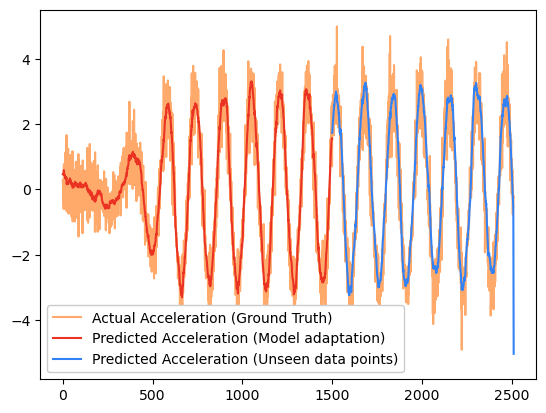

In [532]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:, 2], color='#FFAA6B', label='Actual Acceleration (Ground Truth)')
plt.plot(range(1500), y_pred[:1500, 2], color='#EB3324', label='Predicted Acceleration (Model adaptation)')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 2], color='#3282F6', label='Predicted Acceleration (Unseen data points)')
#plt.savefig('C:/Users/aruna/Downloads/MAML/MAML-D_baseline35z')
legend = plt.legend()
legend.get_frame().set_alpha(1.0)
plt.show()

### Neural-Fly Transfer Controller Data

In [680]:
v_nft_no_wind = torch.zeros((2511,3)) #first input feature
for row in range(len(v_nft_no_wind)):
    for column in range(3):
        v_nft_no_wind[row][column] = Data4[14][0][row][column]
        
v_nft_no_wind.requires_grad = True

fu_nft_no_wind = torch.zeros((2511,3))
for row in range(len(fu_no_wind)):
    fu_nft_no_wind[row][2] = Data5[14][0][row][0]
    
R_nft_no_wind = torch.zeros((2511,3,3))
for matrix in range(len(R_nft_no_wind)):
    for row in range(3):
        for column in range(3):
            R_nft_no_wind[matrix][row][column] = Data6[14][0][matrix][row][column] 
            
acc_nft_no_wind = torch.zeros((2511,3)) # actual acceleration
for ele in range(2510):
    acc_nft_no_wind[ele] = (v_nft_no_wind[ele+1]-v_nft_no_wind[ele])/0.02
acc_nft_no_wind[2510] = acc_nft_no_wind[2509]

Rfu_nft_no_wind = torch.zeros((2511,3)) 
for row in range(len(Rfu_nft_no_wind)):
    Rfu_nft_no_wind[row] = np.matmul(R_nft_no_wind[row],fu_nft_no_wind[row])
    
Rfu_nft_no_wind.requires_grad = True

In [697]:
v_nft_35_wind = torch.zeros((2509,3)) #first input feature
for row in range(len(v_nft_35_wind)):
    for column in range(3):
        v_nft_35_wind[row][column] = Data4[11][0][row][column]
        
v_nft_35_wind.requires_grad = True

fu_nft_35_wind = torch.zeros((2509,3))
for row in range(len(fu_nft_35_wind)):
    fu_nft_35_wind[row][2] = Data5[11][0][row][0]
    
R_nft_35_wind = torch.zeros((2509,3,3))
for matrix in range(len(R_nft_35_wind)):
    for row in range(3):
        for column in range(3):
            R_nft_35_wind[matrix][row][column] = Data6[11][0][matrix][row][column] 
            
acc_nft_35_wind = torch.zeros((2509,3)) # actual acceleration
for ele in range(2508):
    acc_nft_35_wind[ele] = (v_nft_35_wind[ele+1]-v_nft_35_wind[ele])/0.02
acc_nft_35_wind[2508] = acc_nft_35_wind[2507]

Rfu_nft_35_wind = torch.zeros((2509,3)) 
for row in range(len(Rfu_nft_35_wind)):
    Rfu_nft_35_wind[row] = np.matmul(R_nft_35_wind[row],fu_nft_35_wind[row])
    
Rfu_nft_35_wind.requires_grad = True

In [708]:
v_nft_70psin20_wind = torch.zeros((2509,3)) #first input feature
for row in range(len(v_nft_70psin20_wind)):
    for column in range(3):
        v_nft_70psin20_wind[row][column] = Data4[12][0][row][column]
        
v_nft_70psin20_wind.requires_grad = True

fu_nft_70psin20_wind = torch.zeros((2509,3))
for row in range(len(fu_nft_70psin20_wind)):
    fu_nft_70psin20_wind[row][2] = Data5[12][0][row][0]
    
R_nft_70psin20_wind = torch.zeros((2509,3,3))
for matrix in range(len(R_nft_70psin20_wind)):
    for row in range(3):
        for column in range(3):
            R_nft_70psin20_wind[matrix][row][column] = Data6[12][0][matrix][row][column] 
            
acc_nft_70psin20_wind = torch.zeros((2509,3)) # actual acceleration
for ele in range(2508):
    acc_nft_70psin20_wind[ele] = (v_nft_70psin20_wind[ele+1]-v_nft_70psin20_wind[ele])/0.02
acc_nft_70psin20_wind[2508] = acc_nft_70psin20_wind[2507]

Rfu_nft_70psin20_wind = torch.zeros((2509,3)) 
for row in range(len(Rfu_nft_70psin20_wind)):
    Rfu_nft_70psin20_wind[row] = np.matmul(R_nft_70psin20_wind[row],fu_nft_70psin20_wind[row])
    
Rfu_nft_70psin20_wind.requires_grad = True

In [709]:
acc_nf_no_wind = acc_nft_no_wind.detach().numpy()
acc_nf = acc_nft_70psin20_wind.detach().numpy()

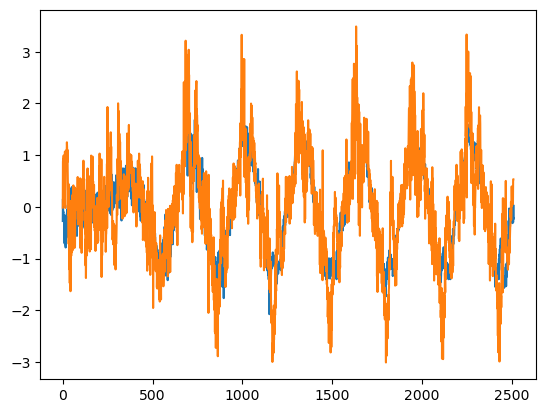

In [710]:
plt.plot(acc_nf_no_wind[:,0])
plt.plot(acc_nf[:,0])

Classic DNN

In [113]:
class RegressionC(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegressionC, self).__init__()
        self.linear1 = (nn.Linear(input_size, 8))
        self.relu1 = nn.ReLU()
        self.linear2 = (nn.Linear(8, 16))
        self.relu2 = nn.ReLU()
        self.linear3 = (nn.Linear(16, 24))
        self.relu3 = nn.ReLU()
        self.linear4 = (nn.Linear(24, 8))
        self.relu4 = nn.ReLU()
        self.linear5 = (nn.Linear(8, output_size))
    
    def forward(self, x):
        out = x
        out = out.unsqueeze(1)
        out = self.linear1(out)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        return out
    
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight.data)
        nn.init.zeros_(m.bias.data)

In [114]:
modelC = RegressionC(6,3)
modelC.apply(init_weights)
optiC = optim.AdamW(modelC.parameters(), lr=0.01)
schedulerC = CosineAnnealingLR(optiC, T_max=200, eta_min=0.0001)
huber_loss = torch.nn.HuberLoss(delta=1.0)

In [115]:
for epoch in range(1000):
    loss = 0
    optiC.zero_grad()
    
    y = modelC(ip[0:1500,:])
    y = y.squeeze(1)
    
    loss = huber_loss(acc_b35[0:1500,:],y)
    loss.backward(retain_graph = True)
    
    optiC.step()
    schedulerC.step()
    loss /= 1500
    print(f"epoch: {epoch}, loss: {loss}")

epoch: 0, loss: 0.00030483733280561864
epoch: 1, loss: 0.00030112339300103486
epoch: 2, loss: 0.0003003445453941822
epoch: 3, loss: 0.000300034589599818
epoch: 4, loss: 0.00029982373234815896
epoch: 5, loss: 0.00029960766551084816
epoch: 6, loss: 0.0002992642985191196
epoch: 7, loss: 0.00029893574537709355
epoch: 8, loss: 0.00029851667932234704
epoch: 9, loss: 0.00029804790392518044
epoch: 10, loss: 0.00029754365095868707
epoch: 11, loss: 0.0002970374480355531
epoch: 12, loss: 0.0002963900042232126
epoch: 13, loss: 0.00029560920665971935
epoch: 14, loss: 0.00029465105035342276
epoch: 15, loss: 0.0002935584634542465
epoch: 16, loss: 0.00029219058342278004
epoch: 17, loss: 0.0002905722940340638
epoch: 18, loss: 0.0002887854352593422
epoch: 19, loss: 0.00028662855038419366
epoch: 20, loss: 0.0002839741064235568
epoch: 21, loss: 0.00028094369918107986
epoch: 22, loss: 0.0002773818850982934
epoch: 23, loss: 0.0002732851717155427
epoch: 24, loss: 0.00026863772654905915
epoch: 25, loss: 0.000

epoch: 208, loss: 6.168581603560597e-05
epoch: 209, loss: 6.166539969854057e-05
epoch: 210, loss: 6.164349906612188e-05
epoch: 211, loss: 6.161989585962147e-05
epoch: 212, loss: 6.159445911180228e-05
epoch: 213, loss: 6.15669705439359e-05
epoch: 214, loss: 6.153734284453094e-05
epoch: 215, loss: 6.150529952719808e-05
epoch: 216, loss: 6.147076055640355e-05
epoch: 217, loss: 6.143358041299507e-05
epoch: 218, loss: 6.139359902590513e-05
epoch: 219, loss: 6.135076546343043e-05
epoch: 220, loss: 6.13047814113088e-05
epoch: 221, loss: 6.12557414569892e-05
epoch: 222, loss: 6.120334728620946e-05
epoch: 223, loss: 6.114740972407162e-05
epoch: 224, loss: 6.108785601099953e-05
epoch: 225, loss: 6.1024555179756135e-05
epoch: 226, loss: 6.0957267123740166e-05
epoch: 227, loss: 6.088599911890924e-05
epoch: 228, loss: 6.0810725699411705e-05
epoch: 229, loss: 6.073067197576165e-05
epoch: 230, loss: 6.064581248210743e-05
epoch: 231, loss: 6.055657649994828e-05
epoch: 232, loss: 6.0462749388534576e-05

epoch: 412, loss: 4.8190962843364105e-05
epoch: 413, loss: 4.817061562789604e-05
epoch: 414, loss: 4.815671491087414e-05
epoch: 415, loss: 4.815285501535982e-05
epoch: 416, loss: 4.8155059630516917e-05
epoch: 417, loss: 4.81587958347518e-05
epoch: 418, loss: 4.8166068154387176e-05
epoch: 419, loss: 4.817500303033739e-05
epoch: 420, loss: 4.8175526899285614e-05
epoch: 421, loss: 4.8178251745412126e-05
epoch: 422, loss: 4.8170073569053784e-05
epoch: 423, loss: 4.815644206246361e-05
epoch: 424, loss: 4.81440220028162e-05
epoch: 425, loss: 4.812943370779976e-05
epoch: 426, loss: 4.812038969248533e-05
epoch: 427, loss: 4.810845712199807e-05
epoch: 428, loss: 4.809722304344177e-05
epoch: 429, loss: 4.809337406186387e-05
epoch: 430, loss: 4.809355232282542e-05
epoch: 431, loss: 4.808868470718153e-05
epoch: 432, loss: 4.808355515706353e-05
epoch: 433, loss: 4.807816003449261e-05
epoch: 434, loss: 4.8077294195536524e-05
epoch: 435, loss: 4.807886580238119e-05
epoch: 436, loss: 4.807244113180786

epoch: 616, loss: 4.792032268596813e-05
epoch: 617, loss: 4.792027539224364e-05
epoch: 618, loss: 4.7920217184582725e-05
epoch: 619, loss: 4.792017352883704e-05
epoch: 620, loss: 4.792012623511255e-05
epoch: 621, loss: 4.792006438947283e-05
epoch: 622, loss: 4.791999526787549e-05
epoch: 623, loss: 4.7919947974151e-05
epoch: 624, loss: 4.7919853386702016e-05
epoch: 625, loss: 4.79197951790411e-05
epoch: 626, loss: 4.79196896776557e-05
epoch: 627, loss: 4.7919606004143134e-05
epoch: 628, loss: 4.791951141669415e-05
epoch: 629, loss: 4.791938772541471e-05
epoch: 630, loss: 4.7919318603817374e-05
epoch: 631, loss: 4.791919491253793e-05
epoch: 632, loss: 4.7919078497216105e-05
epoch: 633, loss: 4.791894389200024e-05
epoch: 634, loss: 4.7918780182953924e-05
epoch: 635, loss: 4.791864921571687e-05
epoch: 636, loss: 4.791851824847981e-05
epoch: 637, loss: 4.79183581774123e-05
epoch: 638, loss: 4.7918216296238825e-05
epoch: 639, loss: 4.7918016207404435e-05
epoch: 640, loss: 4.791783430846408e-

epoch: 821, loss: 4.7861467464827e-05
epoch: 822, loss: 4.783744225278497e-05
epoch: 823, loss: 4.7819983592489734e-05
epoch: 824, loss: 4.779598020832054e-05
epoch: 825, loss: 4.7803634515730664e-05
epoch: 826, loss: 4.779755909112282e-05
epoch: 827, loss: 4.7816331061767414e-05
epoch: 828, loss: 4.78295078210067e-05
epoch: 829, loss: 4.783804251928814e-05
epoch: 830, loss: 4.784501652466133e-05
epoch: 831, loss: 4.783029726240784e-05
epoch: 832, loss: 4.7816130972933024e-05
epoch: 833, loss: 4.7791574615985155e-05
epoch: 834, loss: 4.7783105401322246e-05
epoch: 835, loss: 4.778155198437162e-05
epoch: 836, loss: 4.778555012308061e-05
epoch: 837, loss: 4.779398295795545e-05
epoch: 838, loss: 4.778878792421892e-05
epoch: 839, loss: 4.778486618306488e-05
epoch: 840, loss: 4.777315189130604e-05
epoch: 841, loss: 4.7769870434422046e-05
epoch: 842, loss: 4.7772373363841325e-05
epoch: 843, loss: 4.777627327712253e-05
epoch: 844, loss: 4.777821231982671e-05
epoch: 845, loss: 4.777160211233422

In [133]:
y_pred = modelC(ip)
y_pred = y_pred.squeeze(1)
acc_pred = acc_b35
y_pred = y_pred.detach()
acc_pred = acc_pred.detach()

mse_training: 0.14507442712783813, mse_test: 0.1779841184616089, mse_final: 0.158324733376503


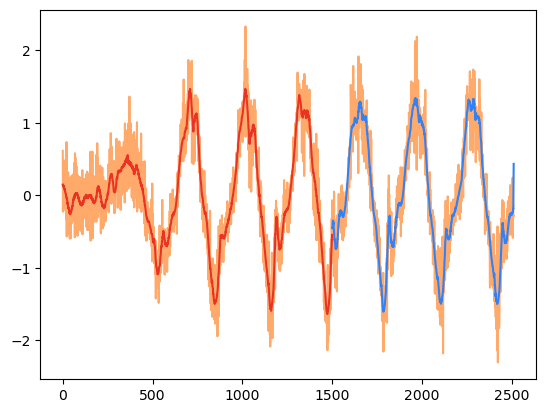

In [136]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:, 0], color='#FFAA6B', label='Actual Acceleration (Ground Truth)')
plt.plot(range(1500), y_pred[:1500, 0], color='#EB3324', label='Predicted Acceleration (Model adaptation)')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 0], color='#3282F6', label='Predicted Acceleration (Unseen data points)')
plt.savefig('C:/Users/aruna/Downloads/MAML/comparative_baseline35x')

plt.show()

In [137]:
y_pred = modelC(ip2)
y_pred = y_pred.squeeze(1)
acc_pred = acc_70psin20
y_pred = y_pred.detach()
acc_pred = acc_pred.detach()

mse_training: 1.110594391822815, mse_test: 1.1550554037094116, mse_final: 1.128495693206787


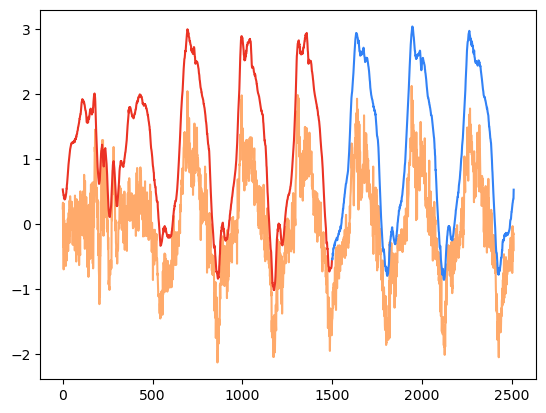

In [138]:
mse_test = mean_squared_error(acc_pred[1500:,:], y_pred[1500:,:])
mse_training = mean_squared_error(acc_pred[0:1500,:],y_pred[0:1500,:])
mse_final = mean_squared_error(acc_pred, y_pred)
print(f"mse_training: {mse_training}, mse_test: {mse_test}, mse_final: {mse_final}")

plt.plot(acc_pred[:, 0], color='#FFAA6B', label='Actual Acceleration (Ground Truth)')
plt.plot(range(1500), y_pred[:1500, 0], color='#EB3324', label='Predicted Acceleration (Model adaptation)')
plt.plot(range(1500, len(acc_final)), y_pred[1500:, 0], color='#3282F6', label='Predicted Acceleration (Unseen data points)')
plt.savefig('C:/Users/aruna/Downloads/MAML/comparative_70psin20x')

plt.show()